<a href="https://colab.research.google.com/github/jm20389/cmt307-g12/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color=red> CMT307 Applied Machine Learning </font>
<a class="anchor" id="main_title"></a>
## Coursework 2 - 2021-2022 Spring semester
### Group 12
Github repository: [cmt307-g12](https://github.com/jm20389/cmt307-g12)

| Name     | Surname  | Student number | e-mail                                                                    |
|----------|----------|----------------|---------------------------------------------------------------------------|
| Matthew  | Esposito | 1845089        | [EspositoMD1@cardiff.ac.uk](mailto:EspositoMD1@cardiff.ac.uk)             |
| Chuntong | Huang    | 21088486       | [HuangC31@cardiff.ac.uk](mailto:HuangC31@cardiff.ac.uk)                   |
| Matthew  | Jepson   | 1723843        | [JepsonMW@cardiff.ac.uk](mailto:JepsonMW@cardiff.ac.uk)                   |
| Guoyi    | Jia      | 2023373        | [JiaG@cardiff.ac.uk](mailto:JiaG@cardiff.ac.uk)                           |
| Zhicong  | Tang     | 21112568       | [TangZ19@cardiff.ac.uk](mailto:TangZ19@cardiff.ac.uk)                     |
| Hekang   | Zhang    | 21040520       | [ZhangH120@cardiff.ac.uk](mailto:ZhangH120@cardiff.ac.uk)                 |
| Xiaoling | Zhu      | 21105789       | [ZhuX41@cardiff.ac.uk](mailto:ZhuX41@cardiff.ac.uk)                       |
| Jose     | Mendoza  | 21015647       | [mendoza-jimenezjc@cardiff.ac.uk](mailto:mendoza-jimenezjc@cardiff.ac.uk) |

<a class="anchor" id="main_title" name="main_title"></a>
Contents
======
***

## [0. Project setup](#0)
<br/>

### [0.0 How to run this script](#0_0)

### [0.1 Import required modules](#0_1)

### [0.2 Source train and test image files](#0_2)
<br/>

### [0.3 Training set](#0_3)
#### [0.3.1 Obtain category names](#0_3_1)
#### [0.3.2 Label all training pictures](#0_3_2)
#### [0.3.3 Create a function to decode all ppm pictures from a given directory into a numpy array](#0_3_3)
#### [0.3.4 Build the training dataset](#0_3_4)
#### [0.3.5 Create a summary file for exploratory data analysis](#0_3_5)
<br/>

### [0.4 Test set](#0_4)

### [0.5 Function to test picture display, given an array object](#0_5)



<br/>

***
## [1. Descriptive analysis of the dataset + Error analysis](#1)
<br/>

### [1.0. Data load](#1_0)
### [1.1. Exploratory data analysis](#1_1)
<br/>

### [1.2. Data visualization](#1_2)
#### [1.2.0 Visualize 25 random pictures](#1_2_0)
#### [1.2.1 Number of pictures per category](#1_2_1)
#### [1.2.2 Average picture area](#1_2_2)
#### [1.2.3 Aspect ratio](#1_2_3)
#### [1.2.4 Boxplot of picture intensity per category](#1_2_4)
#### [1.2.5 Distribution of pixel intensity per category](#1_2_5)


<br/>

***
## [2. Preprocessing + Literature review](#2)
<br/>


### [2.1 Data augmentation](#2_1)
#### [2.1.1 Define transformation methods](#2_1_1)
#### [2.1.2 Data augmentation visualization](#2_1_2)
#### [2.1.3 Increase the training dataset](#2_1_3)
#### [2.1.4 Visualize the balanced dataset](#2_1_4)
#### [2.1.5 Convert dataset objects to numpy arrays](#2_1_5)
<br/>

### [2.2 Data pre-processing](#2_2)
#### [2.2.1 Resize pictures](#2_2_1)
#### [2.2.2 Split training set into train and validation set](#2_2_2)
#### [2.2.3 Dimensionality reduction](#2_2_3)
#### [2.2.4 Convert to black and white without dimensionality reduction](#2_2_4)


<br/>

### [2.3 Literature review](#2_3)

<br/>

***
## [3. Implementation + results](#3)
<br/>

### [3.1 Model implementation](#3_1)
#### [3.1.1. CNN arquitechture ](#3_1_1)

<br/>

### [3.2 Model training and parameter tuning](#3_2)

### [3.3 Performance review](#3_3)

<br/>


Initial discussion and project scope

***
# 0 Project setup
<a class="anchor" id="0" name="0"></a>
#### [Return to index](#main_title)
<br/>



## 0.0 How to run this script:
<a class="anchor" id="0_0" name="0_0"></a>
#### [Return to index](#main_title)

You found this script inside the folder *cmt307-g12*.<br/>
For this script to run, you must include a **data** folder inside the same directory (*cmt307-g12* folder).The **data** folder can be downloaded using this link:

https://cf-my.sharepoint.com/:f:/g/personal/mendoza-jimenezjc_cardiff_ac_uk/EoB0DfS8H_BJi1zNCLRflaIBlJUCf2_NRco5yRzg5gAN_w

<br/>

If for whatever reason the link above doesn't work, you could also find the **data** folder in the [github repository](https://github.com/jm20389/cmt307-g12)

<br/>

Contents of **cmt307-g12** after you include the data folder:

<br/>

|     **Item**     |                                   **Description**                                  | **Required to run** |
|:----------------:|:----------------------------------------------------------------------------------:|:-------------------:|
|    main.ipynb    |                                Present python script                               |         Yes         |
|       data       |                     Folder containing data sources and pictures                    |         Yes         |
|     README.md    |                            README file with instructions                           |          No         |
| requirements.txt | txt file listing required python modules/packages to run the script **main.ipynb** |          No         |


<br/>

This script is capable of detecting whether you are working locally or in Colab, and will adjust the data directory addresses accordingly (section 0.2).

***
<br/>

<br/>

### Option A - Run locally using Jupyter Notebooks:

Download the **data** folder from the above link and paste it inside *cmt307-g12*. 
<br/>
Then the script can be run using Jupyer Notebooks from whatever location.

<br/>



### Option B - Run using Google Colab:

Download the **data** folder from the above link and paste it inside *cmt307-g12*. 
<br/>
For this script to run in Google Colab, **the folder cmt307-g12 must be placed in the ROOT of your Google Drive:**

<br/>

In [ ]:
#%cd /content/gdrive/MyDrive

<br/>

### Option C - Github repository:

This project has been uploaded to github as a repository. You can **clone** this repository in your local machine or in your Google Drive:
<br/>
https://github.com/jm20389/cmt307-g12

If you run this repository in Google Colab, the **repository folder must be cloned in the ROOT of your Google Drive:**
<br/>

<br/>

1. In Google Colab, mount your drive first:
<br/>

In [ ]:
#from google.colab import drive
#drive.mount('/content/gdrive')

2. Navigate through the Google Drive root:
<br/>

In [ ]:
#%cd /content/gdrive/MyDrive
#!ls

3. Clone the repository using Git:
<br/>

In [ ]:
#!git clone https://git_token@github.com/jm20389/cmt307-g12.git

<br/>

***

<br/>

### 0.0.1 The **data** folder structure:
<a class="anchor" id="0_0_1" name="0_0_1"></a>
#### [Return to index](#main_title)
Below there is a description of the contents of the **_data_** folder you earlier downloaded and included within the *cmt307-g12* folder: 

<br/>

**_cmt307-g12/data/_** contents:

| **Item** |      **Location**      |  **Type** |      **Role**     |                                                              **Description**                                                             | **Required to run** |
|:--------:|:----------------------:|:---------:|:-----------------:|:----------------------------------------------------------------------------------------------------------------------------------------:|:-------------------:|
|     A    |       data/train       | Subfolder |    Data source    |            Folder containing train ppm pictures. Pictures are classified in categories (subfolders 0 to 43 for each category)            |       Required      |
|     B    |        data/test       | Subfolder |    Data source    |                             Folder containing test ppm picutres. Contains pictures from different categories                             |       Required      |
|     C    |       data/numpy       | Subfolder | Checkpoint folder | Folder containing checkpoint files: Numpy arrays corresponding to decoded picture sets: x_train, x_test, x_train_resized, x_test_resized |       Optional      |
|     D    |    data/saved_models   | Subfolder | Checkpoint folder |                 Folder containing checkpoint files: Keras models already trained with decoded ppm pictures (x_train set)                 |       Optional      |
|     E    |    data/saved_history  | Subfolder | Checkpoint folder |                 Folder containing checkpoint files: Keras history object and/or dicts created during training                            |       Optional      |
|     F    |  data/saved_csv_logger | Subfolder | Checkpoint folder |                 Folder containing checkpoint files: Keras callbacks csv logger created when creating history object (training)           |       Optional      |
|     G    | data/train_summary.csv |  csv File |  Checkpoint file  |                                                Summary file for exploratory data analysis                                                |       Optional      |
|     H    |      data/Test.csv     |  csv File |    Data source    |                              CSV containing the labels for the test set. Required to build the object y_test                             |       Required      |

***

<br/>

### 0.0.2 Glossary of items (for reference):
<a class="anchor" id="0_0_2" name="0_0_2"></a>
#### [Return to index](#main_title)

<br/>

Below there is a description of the objects used in the present script *main.ipynb*

<br/>

General data contents:

| **Object name**      | **Type** | **Description**                                                                                                                   | 
|:--------------------:|:--------:|:---------------------------------------------------------------------------------------------------------------------------------:|
| cmt307g12_dir        | String   |  Project root directory address                                                                                                   |
| data_dir             | String   |  data directory address                                                                                                           |
| train_dir            | String   |  Directory address for train pictures                                                                                             |
| test_dir             | String   |  Directory address for test pictures                                                                                              |
| numpy_dir            | String   |  Directory address for checkpoint files, both Pickle objects and Numpy arrays                                                     |
| saved_models_dir     | String   |  Directory address for saved Keras models                                                                                         |
| saved_history_dir    | String   |  Directory address for saved history objects created when training Keras models                                                   |
| saved_csv_logger_dir | String   |  Directory address for callbacks csv files created when training Keras models                                                     |
| class_names          | List     |  List of traffic sign types (different categories). The **index** of each item corresponds to its **category number**             |
| x_train              | List     |  Set of decoded pictures (numpy arrays) from the **train** set                                                                    |
| y_train              | List     |  Array where each item is the category **number**(traffic sign) corresponding to each item in x_train                             |
| x_test               | List     |  Set of decoded pictures (numpy arrays) from the **test** set                                                                     |
| y_test               | List     |  Array where each item is the category **number**(traffic sign) corresponding to each item in x_test                              |
| Y_train              | np.array |  Array where each item is the category **number**(traffic sign) corresponding to each item in X_train                             |
| Y_val                | np.array |  Array where each item is the category **number**(traffic sign) corresponding to each item in X_val                               |
| Y_test               | np.array |  Array where each item is the category **number**(traffic sign) corresponding to each item in X_test                              |
| X_train              | np.array |  Set of resized and augmented **train pictures** retrieved from **x_train**, after splitting x_train into train and validation set|
| X_val                | np.array |  Set of **validation pictures** retrieved from **x_train**, after splitting x_train into train and validation set                 |
| X_test               | np.array |  Array where each item is a decoded picture (numpy array) from the **test** set, after resizing to the std width and height       |
| X_train_bm           | np.array |  Set of pictures from the object X_train converted to black and white                                                             |
| X_val_bm             | np.array |  Set of pictures from the object X_val converted to black and white                                                               |
| X_test_bm            | np.array |  Set of pictures from the object X_test converted to black and white                                                              |
| y_train_names        | List     |  Array where each item is a category **name**, (traffic sign) corresponding to each item in x_train. Obtained using *class_names* |
| y_test_names         | List     |  Array where each item is a category **name**, (traffic sign) corresponding to each item in x_test. Obtained using *class_names*  |
| Y_train_names        | List     |  Array where each item is a category **name**, (traffic sign) corresponding to each item in X_train. Obtained using *class_names* |
| Y_val_names          | List     |  Array where each item is a category **name**, (traffic sign) corresponding to each item in X_val. Obtained using *class_names*   |
| Y_test_names         | List     |  Array where each item is a category **name**, (traffic sign) corresponding to each item in Y_test. Obtained using *class_names*  |

<br/>
<br/>

Exploratory data analysis:


| Object name       | Type             | Description                                                                        |
|:-----------------:|:----------------:|:----------------------------------------------------------------------------------:|
| train_summary_df  | pandas dataframe | Summary table for exploratory data analysis. Number of pictures per category       |
| df_pixels         | pandas dataframe | Average pixel intensity for each picture in the training set                       |

<br/>
<br/>

Image classification (Task 3):

| Object name | Type        | Description | Use |
|:-----------:|:-----------:|:-----------:|:---:|
| model       | keras model | CNN model             |     |

<br/>
<br/>



***

## 0.1 Import required modules
<a class="anchor" id="0_1" name="0_1"></a>
#### [Return to index](#main_title)

In [ ]:
# General modules:
import numpy as np
import os
import sys
import random
from datetime import datetime
import pickle

# Exploratory data analysis:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

# Data pre-processing
from sklearn.model_selection import train_test_split
from skimage.transform import resize
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Machine learning modules
import tensorflow as tf
import keras


## 0.2 Source train and test image files
<a class="anchor" id="0_2" name="0_2"></a>
#### [Return to index](#main_title)
<br/>
Check if running in Google Colab before determine data directories


### 0.2.1 Define data directory addresses depending on working environment
<a class="anchor" id="0_2_1" name="0_2_1"></a>
#### [Return to index](#main_title)
<br/>
Check if running in Google Colab before determine data directories

In [ ]:
if 'google.colab' in sys.modules:
    
    from google.colab import drive 
    drive.mount('/content/gdrive')

    cmt307g12_dir = "/content/gdrive/My Drive/cmt307-g12/"
    data_dir = "/content/gdrive/My Drive/cmt307-g12/data/" 
    train_dir = "/content/gdrive/My Drive/cmt307-g12/data/train/"
    test_dir = "/content/gdrive/My Drive/cmt307-g12/data/test/"
    numpy_dir = "/content/gdrive/My Drive/cmt307-g12/data/numpy/"
    saved_models_dir = "/content/gdrive/My Drive/cmt307-g12/data/saved_models/"
    saved_history_dir = "/content/gdrive/My Drive/cmt307-g12/data/saved_history/"
    saved_csv_logger_dir = "/content/gdrive/My Drive/cmt307-g12/data/saved_csv_logger/"

else:
    cmt307g12_dir = ""
    data_dir = "data/"
    train_dir = "data/train/"
    test_dir = "data/test/"
    numpy_dir = "data/numpy/"
    saved_models_dir = "data/saved_models/"
    saved_history_dir = "data/saved_history/"
    saved_csv_logger_dir = "data/saved_csv_logger/"
    

Mounted at /content/gdrive


### 0.2.2 Define **checkpoint** and debugging functions from previous notebook runs
<a class="anchor" id="0_2_2" name="0_2_2"></a>
#### [Return to index](#main_title)
<br/>

The *data* folder contains a subfolder called *numpy*, this folder stores .npy files from previous runs of this notebook, which work as **checkpoints**. If these .npy files are present at the time of running subsequent sections, the objects will be loaded instead of being built from the data sources data/train and data/test:

<br/>
<br/>

Checkpoint and Debugging tools:

|     **Object name**     | **Type** |                                                **Description**                                                |                   **Use**                   |
|:-----------------------:|:--------:|:-------------------------------------------------------------------------------------------------------------:|:-------------------------------------------:|
|     Recover_x_train     | Function |         Restores the object x_train loading the **checkpoint** file "data/numpy/x_train_resized.obj"          |         x_train = Recover_x_train()         |
|     Recover_y_train     | Function |         Restores the object y_train loading the **checkpoint** file "data/numpy/y_train_augmented.obj"        |         y_train = Recover_y_train()         |   
|     Recover_x_test      | Function |          Restores the object x_test loading the **checkpoint** file "data/numpy/x_test_zero.obj"              |          x_test = Recover_x_test()          |
|     Recover_y_test      | Function |         Restores the object y_test loading the **checkpoint** file "data/numpy/y_test.obj"                    |         y_test = Recover_y_test()           |  
|     Recover_Y_train     | Function |         Restores the object Y_train loading the **checkpoint** file "data/numpy/y_train_split.npy"            |         Y_train = Recover_Y_train()         |   
|     Recover_Y_val       | Function |         Restores the object Y_val loading the **checkpoint** file "data/numpy/y_val_split.npy"                |         Y_val = Recover_Y_val()             |
|     Recover_X_train     | Function |         Restores the object X_train loading the **checkpoint** file "data/numpy/x_train_split.npy"            |         X_train = Recover_X_train()         |
|     Recover_X_val       | Function |          Restores the object X_val loading the **checkpoint** file "data/numpy/x_val_split.npy"               |          X_val = Recover_X_val()            |
|     Recover_X_test      | Function |          Restores the object X_val loading the **checkpoint** file "data/numpy/x_test_resized.npy"            |          X_test = Recover_X_test()          |
|   Recover_X_train_bm    | Function |      Restores the object X_train_bm loading the **checkpoint** file "data/numpy/x_train_split_bm.npy"         |      X_train_bm = Recover_X_train_bm()      |
|   Recover_X_val_bm      | Function |      Restores the object X_val_bm loading the **checkpoint** file "data/numpy/x_val_split_bm.npy"             |      X_val_bm = Recover_X_val_bm()          |
|   Recover_X_test_bm     | Function |      Restores the object X_val_bm loading the **checkpoint** file "data/numpy/x_test_resized_bm.npy"          |      X_test_bm = Recover_X_test_bm()        |
|  RecoverEverything      | Function |  Attemps to recover the whole environment looking for all checkpoints. Variables are defined as global.       |  RecoverEverything()                        |
|       PlotPicture       | Function |      Displays an array-form picture from x_train or x_test sets (np.array) using pyplot, giving its index     |  Example: PlotPicture(x_train, y_train_names, 1234):|

<br/>
<br/>

***

In [ ]:
# Pickle functions to save and load python objects:

def SavePickleObject(filepath, object):

    '''
    Save a python object as a binary file using Python's Pickle.
    '''
    #with open(filepath + ".obj", "wb+") as file:
    with open(filepath, "wb+") as file:
        pickle.dump(object, file) # Note: Saving history dict (history.history) with Pickle does NOT require .item() when loading with np.load

    return None 


def LoadPickleObject(filepath):

    '''
    Load a python object from a binary file previously saved with Python's Pickle.
    '''
    with open(filepath, 'rb') as file:
        object_reloaded = pickle.load(file)

    # Load numpy's binary object using np.load: np.load(filepath, allow_pickle = True).item()

    return object_reloaded



# Checkpoint and debug functions to load objects saved in the data folder data/numpy/ :

def Recover_class_names():
    try:
        with open(numpy_dir + "class_names.txt") as class_file:
            class_names = class_file.read().split("\n")

        return class_names

    except:
        print('Failed to recover class_names')
        return None

    
# Python objects:
    
# Original sets and labels

def Recover_x_train(stage = "resized"):
    
    if stage == "resized":
        try:
            return np.load(numpy_dir + "x_train_resized.npy", allow_pickle = True)

        except:
            print('Failed to recover x_train') 
            return None
        
    
    elif stage == "augmented":
        try:
            return LoadPickleObject(numpy_dir + "x_train_augmented.obj")

        except:
            print('Failed to recover x_train')
            return None

    
    elif stage == "zero":
        try:
            return LoadPickleObject(numpy_dir + "x_train_zero.obj")

        except:
            print('Failed to recover x_train')
            return None
                      
    
    else:
        print('Failed to recover x_train. Unrecognized stage.')
        return None

    
def Recover_y_train(stage = "augmented"):
    
    if stage == "augmented":
        try:           
            return LoadPickleObject(numpy_dir + "y_train_augmented.obj")

        except:
            print('Failed to recover y_train')   
            return None
                         
    elif stage == "zero":
        try:           
            return LoadPickleObject(numpy_dir + "y_train_zero.obj")

        except:
            print('Failed to recover y_train')           
            return None
                        
    else:
        print('Failed to recover y_train. Unrecognized stage.')
        return None


def Recover_x_test(stage = "resized"):
    
    if stage == "resized":
        try:            
            return np.load(numpy_dir + "x_test_resized.npy", allow_pickle = True)

        except:
            print('Failed to recover x_test')           
            return None
                         
    elif stage == "zero":
        try:           
            return LoadPickleObject(numpy_dir + "x_test_zero.obj")

        except:
            print('Failed to recover x_test')           
            return None
                       
    else:
        print('Failed to recover x_test. Unrecognized stage.')
        return None
        

def Recover_y_test():
    try:        
        return LoadPickleObject(numpy_dir + "y_test_zero.obj")

    except:
        print('Failed to recover y_test')        
        return None

    
# Numpy arrays:

# Colour set

def Recover_X_test():
    try:       
        return np.load(numpy_dir + "x_test_resized.npy", allow_pickle=True)

    except:
        print('Failed to recover X_test')       
        return None
    
           
def Recover_X_train():
    try:       
        return np.load(numpy_dir + "x_train_split.npy", allow_pickle=True)
    
    except:
        print('Failed to recover X_train')       
        return None
    

def Recover_X_val():
    try:        
        return np.load(numpy_dir + "x_val_split.npy", allow_pickle=True)

    except:
        print('Failed to recover X_val')       
        return None
    

# Black and White set

def Recover_X_test_bw():
    try:       
        return np.load(numpy_dir + "x_test_resized_bw.npy", allow_pickle=True)

    except:
        print('Failed to recover X_test_bw')       
        return None
    

def Recover_X_train_bw():
    try:       
        return np.load(numpy_dir + "x_train_split_bw.npy", allow_pickle=True)
    
    except:
        print('Failed to recover X_train_bw')       
        return None
    

def Recover_X_val_bw():
    try:        
        return np.load(numpy_dir + "x_val_split_bw.npy", allow_pickle=True)

    except:
        print('Failed to recover X_val_bw')       
        return None
    
  
# Labels for augmented sets

def Recover_Y_train():
    try:       
        return np.load(numpy_dir + "y_train_split.npy", allow_pickle=True)

    except:
        print('Failed to recover Y_train')      
        return None


def Recover_Y_val():
    try:        
        return np.load(numpy_dir + "y_val_split.npy", allow_pickle=True)

    except:
        print('Failed to recover Y_val')       
        return None
    


# Restore whole working environment loading all objects before section 3 (image classification):

def RecoverEverything(x_train_stage = "augmented", x_test_stage = "resized"):

  # Declare global variables to be available at the global scope:
    global class_names, x_train, y_train, x_test, y_test, X_test, X_train, Y_train, X_val, Y_val
    global X_test_bw, X_train_bw, X_val_bw
  
  # Recover all script objects by calling their corresponding recovery functions:
    class_names = Recover_class_names()
    
    # Python lists
    x_train = Recover_x_train(stage = x_train_stage)
    y_train = Recover_y_train()
    
    # Python lists
    x_test = Recover_x_test(stage = x_test_stage)
    y_test = Recover_y_test()
    
    # Train, validation and test

        # Labels
    Y_train = Recover_Y_train()
    Y_val = Recover_Y_val() 
        # Color set
    X_train = Recover_X_train()
    X_val = Recover_X_val()
    X_test = Recover_X_test() 
        # Black and White set
    X_train_bw = Recover_X_train_bw()
    X_val_bw = Recover_X_val_bw()
    X_test_bw = Recover_X_test_bw()

  # Y_test recover (for naming convention)
    try:
        global Y_test
        Y_test = np.array(y_test)   # Originally was created just for name convention consistency in Section 3
    except:
        print('Failed to recover Y_test')


  # Names from Section 1:
    try:
        global y_train_names
        y_train_names = [class_names[label] for label in y_train]
    except:
        print('Failed to recover y_train_names')
  
    try:
        global y_test_names
        y_test_names = [class_names[label] for label in y_test]
    except:
        print('Failed to recover y_test_names')
  

  # Names from Section 2:
    try:
        global Y_train_names
        Y_train_names = [class_names[label] for label in Y_train]
    except:
        print('Failed to recover Y_train_names')

    try:
        global Y_val_names
        Y_val_names = [class_names[label] for label in Y_val]
    except:
        print('Failed to recover Y_val_names')

    try:
        global Y_test_names # Originally was created just for name convention/consistency in Section 3
        Y_test_names = y_test_names
    except:
        print('Failed to recover Y_test_names')
  

    # Resizing parameters (input shape for section 3)
    global img_height, img_width, channels
    img_height = 30
    img_width = 30
    channels = 3

    recover_vars = [
                    "class_names",
                    "x_train",
                    "y_train",
                    "y_train_names",
                    "x_test",
                    "y_test",
                    "y_test_names",
                    "Y_train",
                    "Y_train_names",
                    "Y_val",
                    "X_train",
                    "X_val",
                    "X_test",
                    "X_train_bw",
                    "X_val_bw",
                    "X_test_bw",
                    "img_height",
                    "img_width",
                    "channels"
                    ]

    for var in recover_vars:

        if var == "x_train":
            stage = ", " + x_train_stage + " stage"
        
        elif var == "x_test":
            stage = ", " + x_test_stage + " stage"
        
        else:
            stage = ""

        if var in globals():
            print(var, " recovered", stage)
        

    return None  


# Create a function to check picture display, given an array object:

def PlotPicture(pic_set, pic_labels, index):
    
    # Dataset is a list:
    
    if isinstance(pic_set, list):
        plt.figure()
        plt.imshow(pic_set[index], cmap = 'gray')
        plt.title(pic_labels[index])
        plt.show()
    
    # Dataset is a numpy array:
    
    else:
        plt.figure()
        plt.imshow(pic_set[index, ], cmap = 'gray')
        plt.title(pic_labels[index])
        plt.show()

    return None

## 0.3 Training set
<a class="anchor" id="0_3" name="0_3"></a>
#### [Return to index](#main_title)

In this section, we navigate through the contents of data/train and convert ppm pictures into numpy arrays using pyplot.imread:

### 0.3.1 Obtain category names
<a class="anchor" id="0_3_1" name="0_3_1"></a>
#### [Return to index](#main_title)
Below there is a python list containing the names of each category (category = traffic sign). The **index** from each item in the list corresponds to its **category number**. For example, category ID 0 corresponds to the traffic sign "Max Speed 20 km/h", category ID 1 corresponds to the traffic sign "Max Speed 30 km/h", etc.

|            **Category name**            | **Category number** |
|:---------------------------------------:|:-------------------:|
|            Max Speed 20 km/h            |          0          |
|            Max Speed 30 km/h            |          1          |
|            Max Speed 50 km/h            |          2          |
|            Max Speed 60 km/h            |          3          |
|            Max Speed 70 km/h            |          4          |
|            Max Speed 80 km/h            |          5          |
|           End of 80 km/h zone           |          6          |
|            Max Speed 100 km/h           |          7          |
|            Max Speed 120 km/h           |          8          |
|                No passing               |          9          |
| No passing for vehicles over 3.5 tonnes |          10         |
|                 Priority                |          11         |
|              Priority road              |          12         |
|                  Yield                  |          13         |
|                   Stop                  |          14         |
|               Road closed               |          15         |
|   Vehicles over 3.5 tonnes prohibited   |          16         |
|               Do not enter              |          17         |
|              General danger             |          18         |
|                Left curve               |          19         |
|               Right curve               |          20         |
|               Double curve              |          21         |
|           Uneven road surface           |          22         |
|        Slippery when wet or dirty       |          23         |
|               Road narrows              |          24         |
|                Roadworks                |          25         |
|          Traffic signals ahead          |          26         |
|               Pedestrians               |          27         |
|            Watch for children           |          28         |
|             Bicycle crossing            |          29         |
|                Ice - snow               |          30         |
|           Wild animal crossing          |          31         |
|         End of all restrictions         |          32         |
|             Turn right ahead            |          33         |
|             Turn left ahead             |          34         |
|                Ahead only               |          35         |
|         Ahead or turn right only        |          36         |
|         Ahead or turn left only         |          37         |
|             Pass by on right            |          38         |
|             Pass by on left             |          39         |
|                Roundabout               |          40         |
|          End of no passing zone         |          41         |
|    End of no passing zone for trucks    |          42         |

In [ ]:
if "class_names.txt" in os.listdir(data_dir + "numpy/"):
    class_names = Recover_class_names()

else:
    
    class_names = [
    "Max Speed 20 km/h",
    "Max Speed 30 km/h",
    "Max Speed 50 km/h",
    "Max Speed 60 km/h",
    "Max Speed 70 km/h",
    "Max Speed 80 km/h",
    "End of 80 km/h zone",
    "Max Speed 100 km/h",
    "Max Speed 120 km/h",
    "No passing",
    "No passing for vehicles over 3.5 tonnes",
    "Priority",
    "Priority road",
    "Yield",
    "Stop",
    "Road closed",
    "Vehicles over 3.5 tonnes prohibited",
    "Do not enter",
    "General danger",
    "Left curve",
    "Right curve",
    "Double curve",
    "Uneven road surface",
    "Slippery when wet or dirty",
    "Road narrows",
    "Roadworks",
    "Traffic signals ahead",
    "Pedestrians",
    "Watch for children",
    "Bicycle crossing",
    "Ice - snow",
    "Wild animal crossing",
    "End of all restrictions",
    "Turn right ahead",
    "Turn left ahead",
    "Ahead only",
    "Ahead or turn right only",
    "Ahead or turn left only",
    "Pass by on right",
    "Pass by on left",
    "Roundabout",
    "End of no passing zone",
    "End of no passing zone for trucks"
    ]

    def Create_class_names(filepath, class_names):

        with open(filepath, 'w+') as output_file:
            for name in class_names:
                if name == class_names[-1]:
                    output_file.write(name)
                else:
                    output_file.write(name + '\n')
                    
        return None


    Create_class_names(numpy_dir + "class_names.txt", class_names)

### 0.3.2 Label all training pictures
<a class="anchor" id="0_3_2" name="0_3_2"></a>
#### [Return to index](#main_title)


**y_train**:

In [ ]:
# Look for checkpoint files before attempting to decode category codes:

if "y_train_zero.obj" in os.listdir(numpy_dir):
    y_train = LoadPickleObject(numpy_dir + "y_train_zero.obj")
  
else:

    y_train = []

    for folder in os.listdir(train_dir):
    
        pictures = [pic for pic in os.listdir(train_dir + "/" + folder) if pic.split(".")[-1] == "ppm" ] # filter out non-ppm files
    
        for picture in pictures:
            y_train.append(int(folder))
  
    SavePickleObject(numpy_dir + "y_train_zero.obj", y_train)


# Build the labels name object translating category number into category name:
y_train_names = [class_names[label] for label in y_train]

### 0.3.3 Create a function to decode all ppm pictures from a given directory into a numpy array
<a class="anchor" id="0_3_3" name="0_3_3"></a>
#### [Return to index](#main_title)


In [ ]:
#Create a filtered list of .ppm files, then call plt.imread on the resulting list.

def PpmToNumpy(directory, tolist = False):
    
    '''
    Given a host directory containing ppm pictures, converts the pictures into a numpy array, returning an array with the whole list of pictures.

    Params:
    String containing a directory address.

    Returns:
    numpy array whose items are decoded ppm pictures (np.array)

    '''

    files = os.listdir(directory)
    files = [file for file in files if file.split(".")[1] == "ppm"] # to ensure only ppm images are called
    
    if tolist:
        return [plt.imread(directory + file) for file in files]
    
    else:
        return np.array([plt.imread(directory + file) for file in files], dtype=object)
                       

### 0.3.4 Build the training dataset
<a class="anchor" id="0_3_4" name="0_3_4"></a>
#### [Return to index](#main_title)


**x_train**:

In [ ]:
# Look for checkpoints before attempting to decode train images:

if "x_train_zero.npy" in os.listdir(numpy_dir):
    x_train = LoadPickleObject(numpy_dir + "x_train_zero.obj")

else:

    all_images = [ PpmToNumpy(train_dir + folder + "/", tolist = True) for folder in os.listdir(train_dir)]
  
  # Concatenate the pics from all the folders:       
    x_train = [y for x in all_images for y in x]
    
    SavePickleObject(numpy_dir + "x_train_zero.obj", x_train)    

## 0.4 Test set
<a class="anchor" id="0_4" name="0_4"></a>
#### [Return to index](#main_title)

**y_test**:



In [ ]:
# Look for checkpoints before attempting to load test labels from Test.csv:

if "y_test_zero.obj" in os.listdir(numpy_dir):
    y_test = LoadPickleObject(numpy_dir + "y_test_zero.obj")

else:

  # Labels from the test set are obtained from the file "Test.csv", located in the data folder:

    test_meta = pd.read_csv(data_dir + "Test.csv")
    y_test =  list(test_meta["ClassId"])

    SavePickleObject(numpy_dir + "y_test_zero.obj", y_test)

# Build the labels name object translating category number into category name:
y_test_names = [class_names[label] for label in y_test]

**x_test**: 

In [ ]:
# Look for checkpoints before attempting to decode **test** images:

if "x_test_zero.obj" in os.listdir(data_dir + "numpy/"):
    x_test = LoadPickleObject(numpy_dir + "x_test_zero.obj")

else:
    x_test = PpmToNumpy(test_dir, tolist = True)

    SavePickleObject(numpy_dir + "x_test_zero.obj", x_test)

## 0.5 Function to test picture display, given an array object:
<a class="anchor" id="0_5" name="0_5"></a>
#### [Return to index](#main_title)

Check the debugging function *PlotPicture* defined at section 0.2 to display a random picture from the test set (x_test):

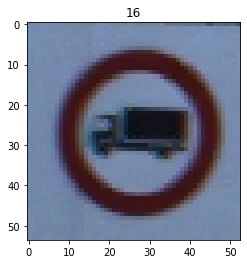

LABEL:  Vehicles over 3.5 tonnes prohibited


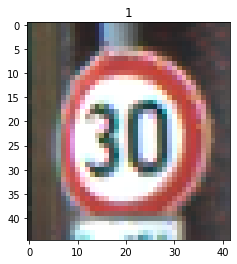

LABEL:  Max Speed 30 km/h


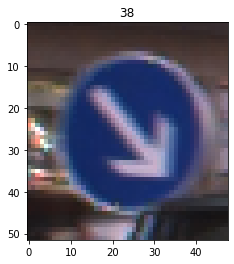

LABEL:  Pass by on right


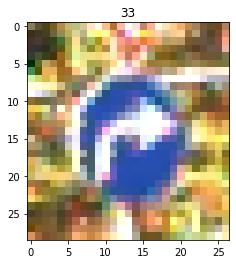

LABEL:  Turn right ahead


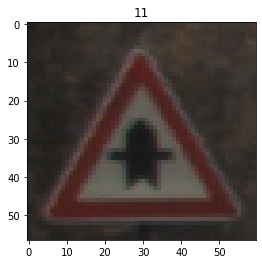

LABEL:  Priority


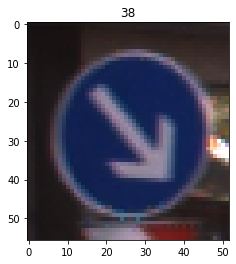

LABEL:  Pass by on right


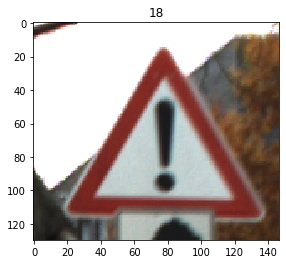

LABEL:  General danger


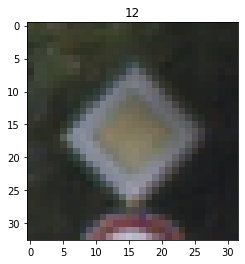

LABEL:  Priority road


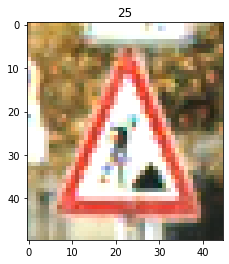

LABEL:  Roadworks


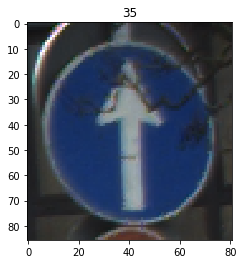

LABEL:  Ahead only


In [ ]:
for index in range(10):

    PlotPicture(x_test, y_test, index)
    print('LABEL: ', class_names[y_test[index]])

***
# 1 Descriptive analysis of the dataset + error analysis 
<a class="anchor" id="1" name="1"></a>
#### [Return to index](#main_title)
<br/>

The scope of this section is to get a general idea of the whole dataset.
We will start creating a histogram to see how many pictures are available for each category.

## 1.0 Data load 
<a class="anchor" id="1_0" name="1_0"></a>
#### [Return to index](#main_title)
Create a dataframe for exploratory data analysis from the train datasets, **train_df**, saved as csv file _train_summary.csv_

In [ ]:
# Look for checkpoint files before attempting to build the training dataframe:

if "train_summary.csv" in os.listdir(data_dir):
    train_df = pd.read_csv(data_dir + "train_summary.csv")
    test_df = pd.read_csv(data_dir + "Test.csv")

else:
    train_summary = dict.fromkeys(["Width", "Height", "ClassId"], [])
    widths = []
    heights = []

    for picture in x_train:
        widths.append(picture.shape[0])
        heights.append(picture.shape[1])

    train_summary["Width"] = widths
    train_summary["Height"] = heights
    train_summary["ClassId"] = y_train

    train_summary_df = pd.DataFrame(train_summary)
    train_summary_df.to_csv(data_dir + "train_summary.csv", index = False)


# Once the dataframe has been loaded, create an additional column to explore picture area:
train_df['Area'] = train_df.Height * train_df.Width

# Explore the dataframes:
print('train_df dataframe:\n', train_df.head())
print('test_df dataframe:\n', test_df.head())


In [ ]:
# Explore the number of files:

print('The amount of training items is {}'.format(len(train_df.index)))
print('The amount of test items is {}'.format(len(test_df.index)))

The amount of training items is 39209
The amount of test items is 12630


In [ ]:
categories_amount = len(os.listdir(train_dir))
print('The number of different categories is {}'.format(categories_amount))

The number of different categories is 43


In [ ]:
print('Check the number of missing items:\n')
print(train_df.isna().sum())

if sum(train_df.isna().sum()) == 0:
    print('\nNo missing items')
else:
    print('\nSome missing items')

Check the number of missing items:

Width      0
Height     0
ClassId    0
Area       0
dtype: int64

No missing items


## 1.1 Exploratory data analysis 
<a class="anchor" id="1_1" name="1_1"></a>
#### [Return to index](#main_title)
<br/>

##### Explore category features by creating a dataframe with aggregated data per **category** - *train_df_cat*

In [ ]:
train_df_cat = train_df.groupby('ClassId', as_index=False).mean().sort_values(by='Area', ascending=True)

print(train_df_cat.head())

    ClassId      Width     Height         Area
17       17  40.273874  38.010811  1677.474775
6         6  42.126190  40.404762  1881.604762
42       42  41.291667  41.145833  1885.904167
32       32  41.425000  41.004167  1968.908333
5         5  42.823656  42.515054  2083.274194


## 1.2 Data visualization 
<a class="anchor" id="1_2" name="1_2"></a>
#### [Return to index](#main_title)

### 1.2.0 Visualize 25 random pictures
<a class="anchor" id="1_2_0" name="1_2_0"></a>
#### [Return to index](#main_title)
<br/>

Before we start exploring the dataset, we plot 25 random pictures from the Test directory, to see what the pictures look like:

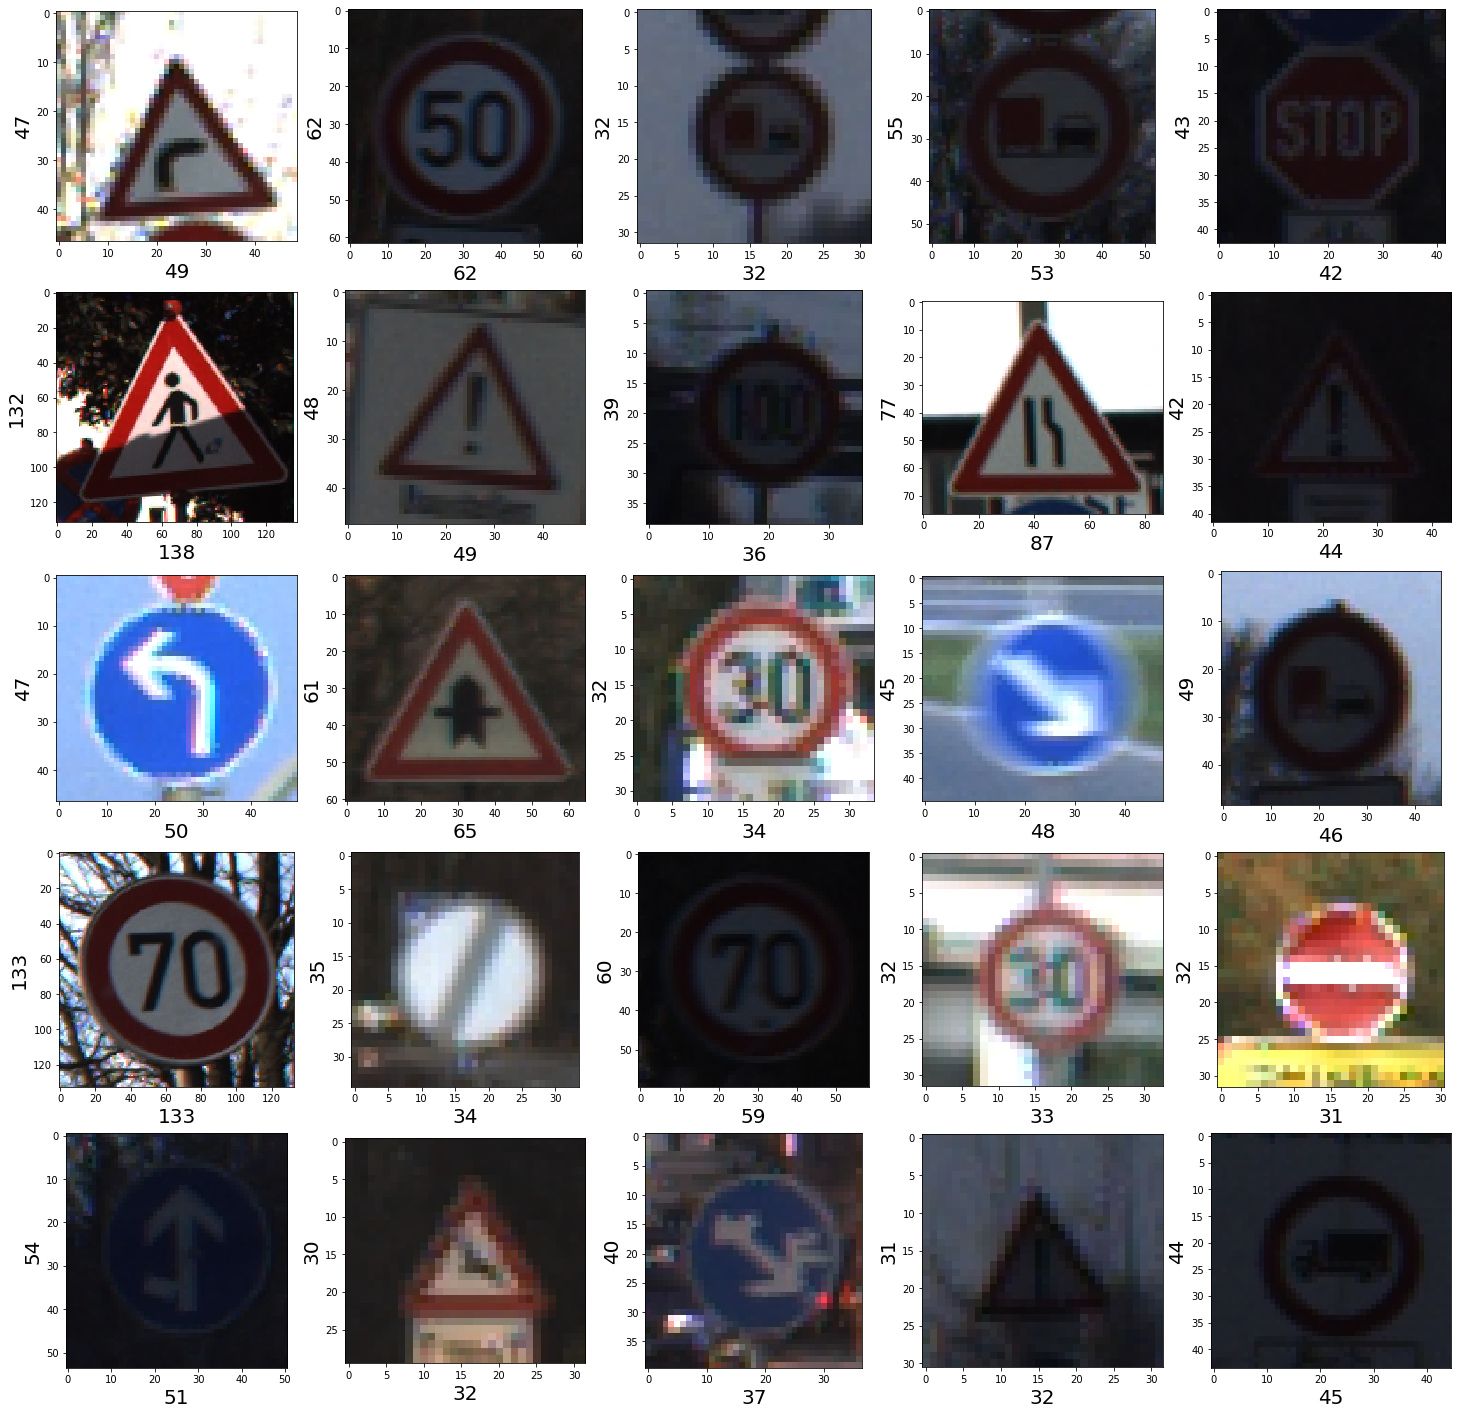

In [ ]:
imgs = os.listdir(test_dir)
from matplotlib.image import imread

plt.figure(figsize=(25,25))

for i in range(1,26):
    
    plt.subplot(5,5,i)
    random_img_path = test_dir + random.choice(imgs)
    rand_img = imread(random_img_path)
    
    plt.imshow(rand_img)
    #plt.grid(b=None)
    plt.xlabel(rand_img.shape[1], fontsize = 20)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 20)#height of image
    
plt.savefig(cmt307g12_dir + "report/images/random_pictures.png")
    

### 1.2.1 Number of pictures per category 
<a class="anchor" id="1_2_1" name="1_2_1"></a>
#### [Return to index](#main_title)
<br/>

Create a **barplot** to explore number of pictures per category:

In [ ]:
train_counts = train_df.ClassId.value_counts().sort_values(ascending = True)

train_counts[:10]

0     210
19    210
37    210
27    240
41    240
42    240
32    240
29    270
24    270
39    300
Name: ClassId, dtype: int64

What is the **category** with the **largest** amount of pictures:

In [ ]:
max_num_category = train_counts.loc[train_counts.values == max(train_counts.values)]

print("The category with the biggest amount of pictures is category number ",
      train_counts.loc[train_counts.values == max(train_counts.values)].index[0],
      " ,", class_names[train_counts.loc[train_counts.values == max(train_counts.values)].index[0]],
      ", with ", train_counts.loc[train_counts.values == max(train_counts.values)].values[0], " pictures."
     )

largest_amount = train_counts.loc[train_counts.values == max(train_counts.values)].values[0]

The category with the biggest amount of pictures is category number  2  , Max Speed 50 km/h , with  2250  pictures.


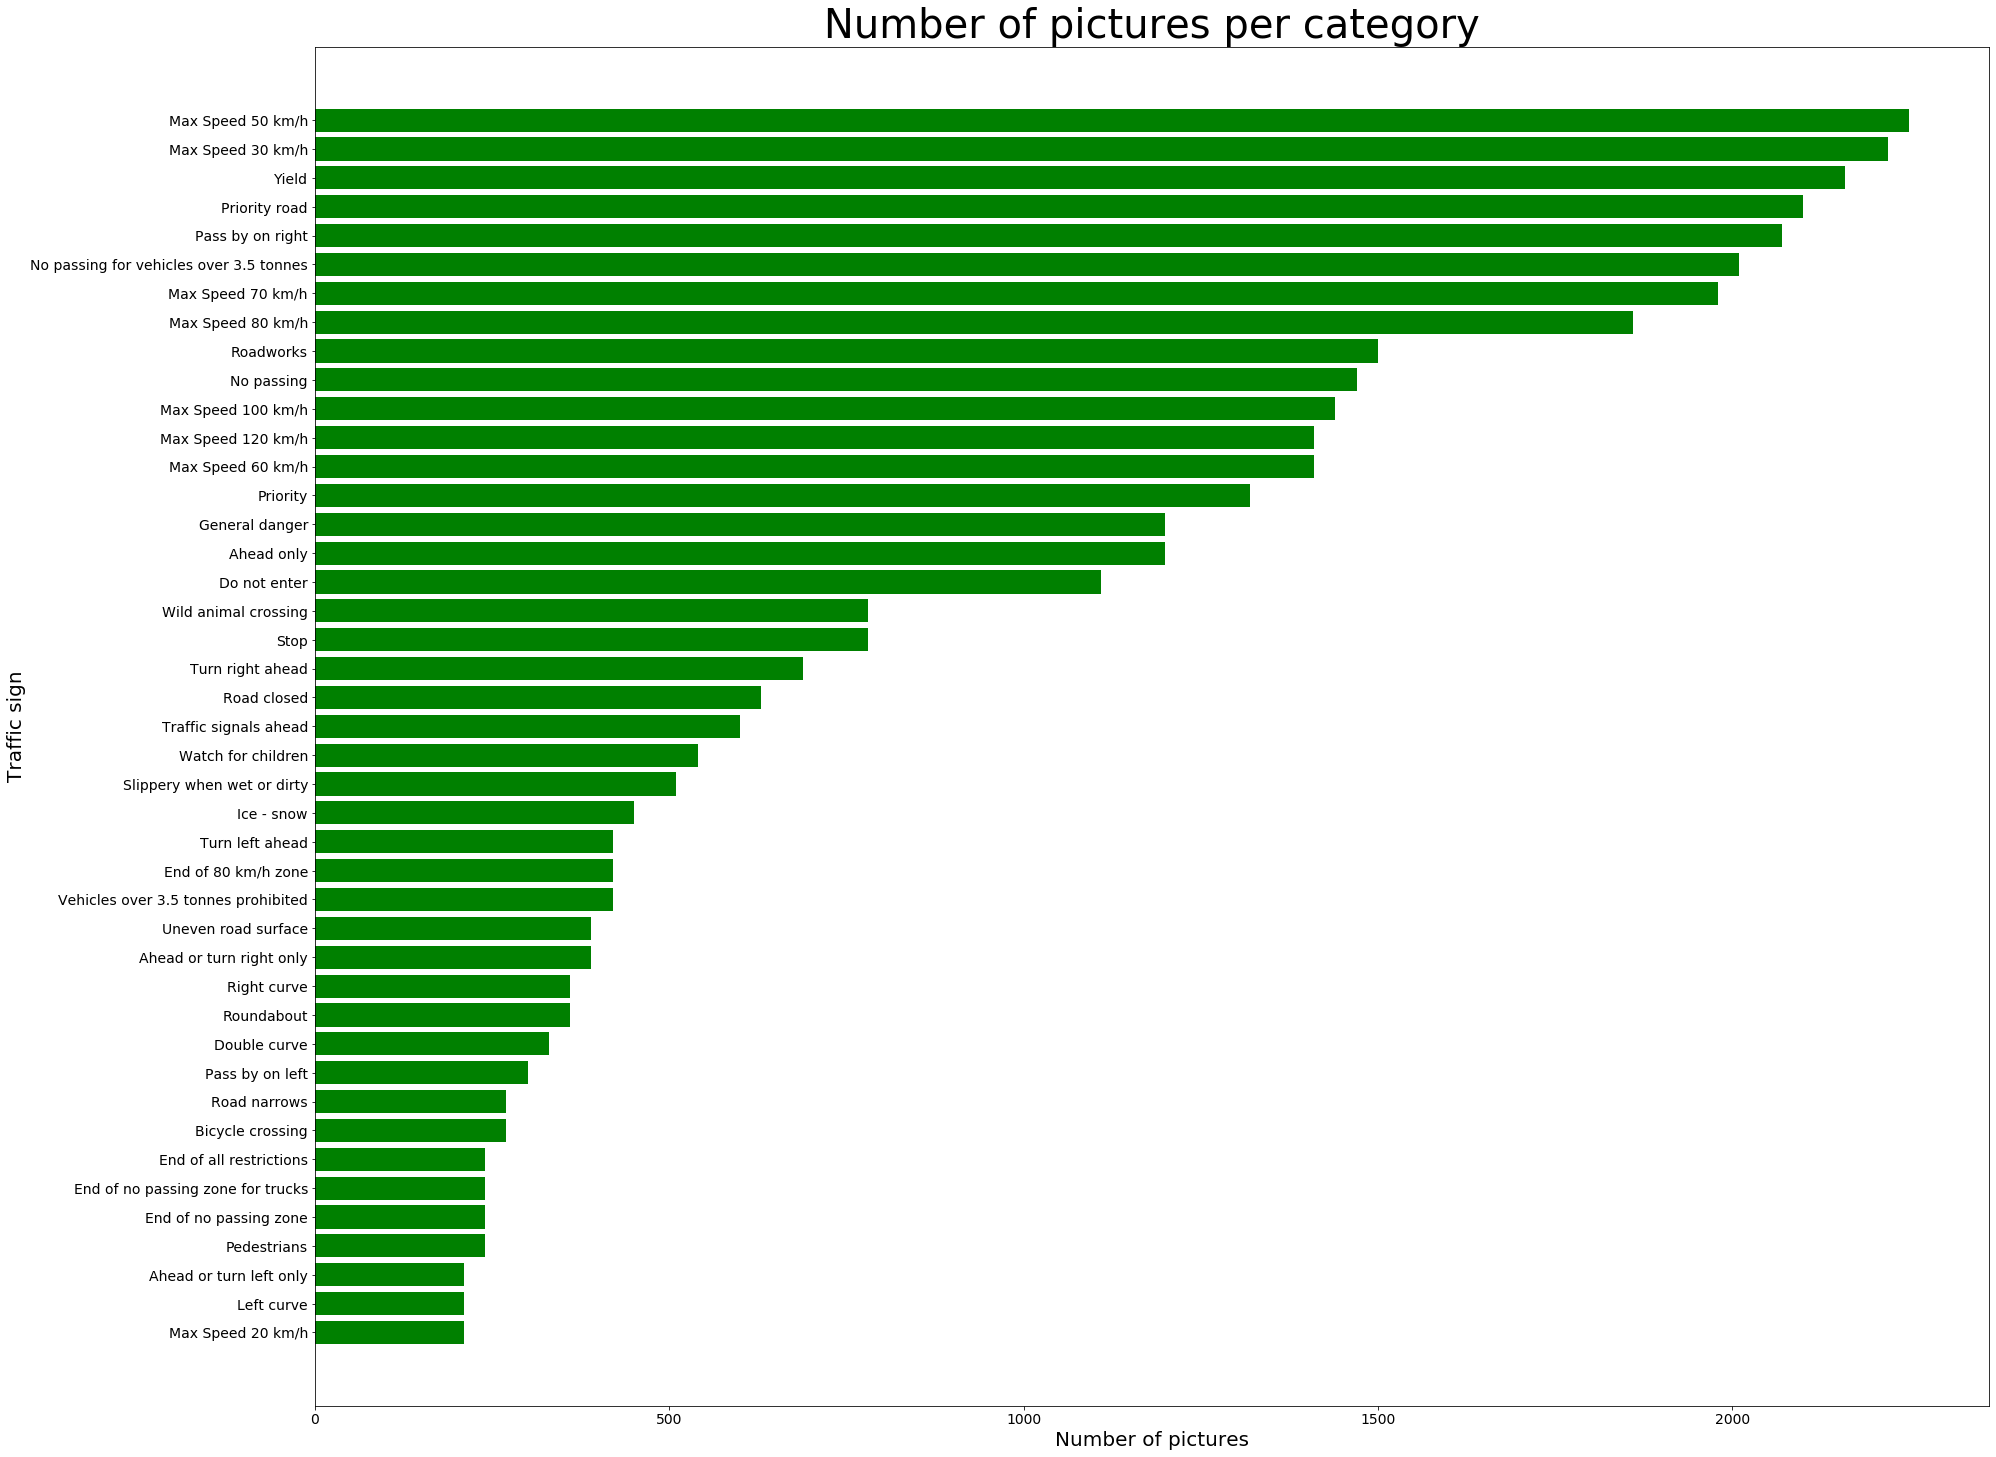

In [ ]:
fig = plt.figure(figsize=(30, 25))
ax=plt.subplot()

plt.barh(range(len(train_counts)), train_counts.values, color = 'green')
plt.title('Number of pictures per category', fontsize=40)
plt.xlabel('Number of pictures', fontsize = 20)
plt.ylabel('Traffic sign', fontsize = 20)

labels = [ class_names[i] for i in train_counts.index ]
#labels = train_counts.index

ax.set_yticks(range(len(train_counts)))
ax.set_yticklabels(labels)

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

plt.savefig(cmt307g12_dir + "report/images/num_pictures_barplot.png")

plt.show()


Calculate how many pictures every category has, on average:

In [ ]:
# What is the average number of pictures per category?

avg_num_pics = round(train_df.ClassId.value_counts().mean())
print("The average number of pictures per category is: ", avg_num_pics)

The average number of pictures per category is:  912


Determine the minority categories by calculating the number of pictures per category in relation to the total dataset (percentage)

In [ ]:
# Determine the percentage per category using value_counts:
train_counts_perc = train_df.ClassId.value_counts(normalize = True).sort_values(ascending = True).apply(lambda x: round(x * 100,2))

# Convert series to dataframe so new columns can be added:
train_counts_perc = pd.DataFrame(train_counts_perc).reset_index()
train_counts_perc.columns = ['ClassId', 'Percentage']

# Translate category number to category name:
train_counts_perc["Category"] = train_counts_perc["ClassId"].apply(lambda x: class_names[x])

In [ ]:
train_counts_perc[:5]

,ClassId,Percentage,Category
0,0,0.54,Max Speed 20 km/h
1,19,0.54,Left curve
2,37,0.54,Ahead or turn left only
3,27,0.61,Pedestrians
4,41,0.61,End of no passing zone


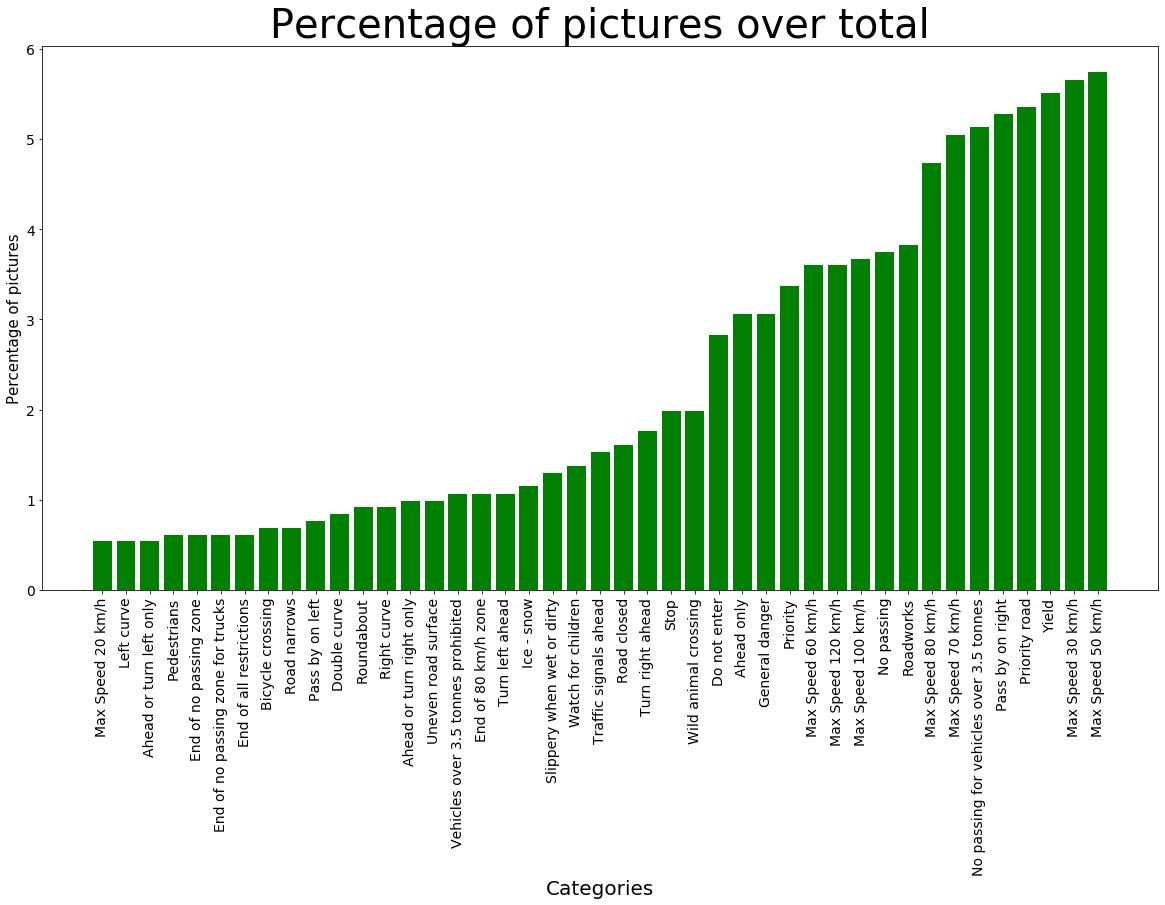

In [ ]:
#sns.barplot(x = "Category", y = "Percentage", data = train_counts_perc)

fig = plt.figure(figsize=(20, 10))
ax=plt.subplot()

plt.bar(train_counts_perc["Category"], train_counts_perc["Percentage"], color = 'green')
plt.title('Percentage of pictures over total', fontsize=40)
plt.xlabel('Categories', fontsize = 20)
plt.ylabel('Percentage of pictures', fontsize = 15)


plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation = 90)

plt.savefig(cmt307g12_dir + "report/images/num_pictures_barplot.png")

plt.show()

By looking at the above graph we see that the minority categories have a percent contribution of less than 2% of the total. Label this categories as "minority" by adding a boolean column:

In [ ]:
is_minority = lambda x: True if round(x["Percentage"]) < 2 else False
train_counts_perc["Minority"] = train_counts_perc.apply(is_minority, axis = 1)

train_counts_perc[:5]

,ClassId,Percentage,Category,Minority
0,0,0.54,Max Speed 20 km/h,True
1,19,0.54,Left curve,True
2,37,0.54,Ahead or turn left only,True
3,27,0.61,Pedestrians,True
4,41,0.61,End of no passing zone,True


### 1.2.2 Average picture area
<a class="anchor" id="1_2_2" name="1_2_2"></a>
##### [Return to index](#main_title)
<br/>

Create a **barplot** to explore average picture area:

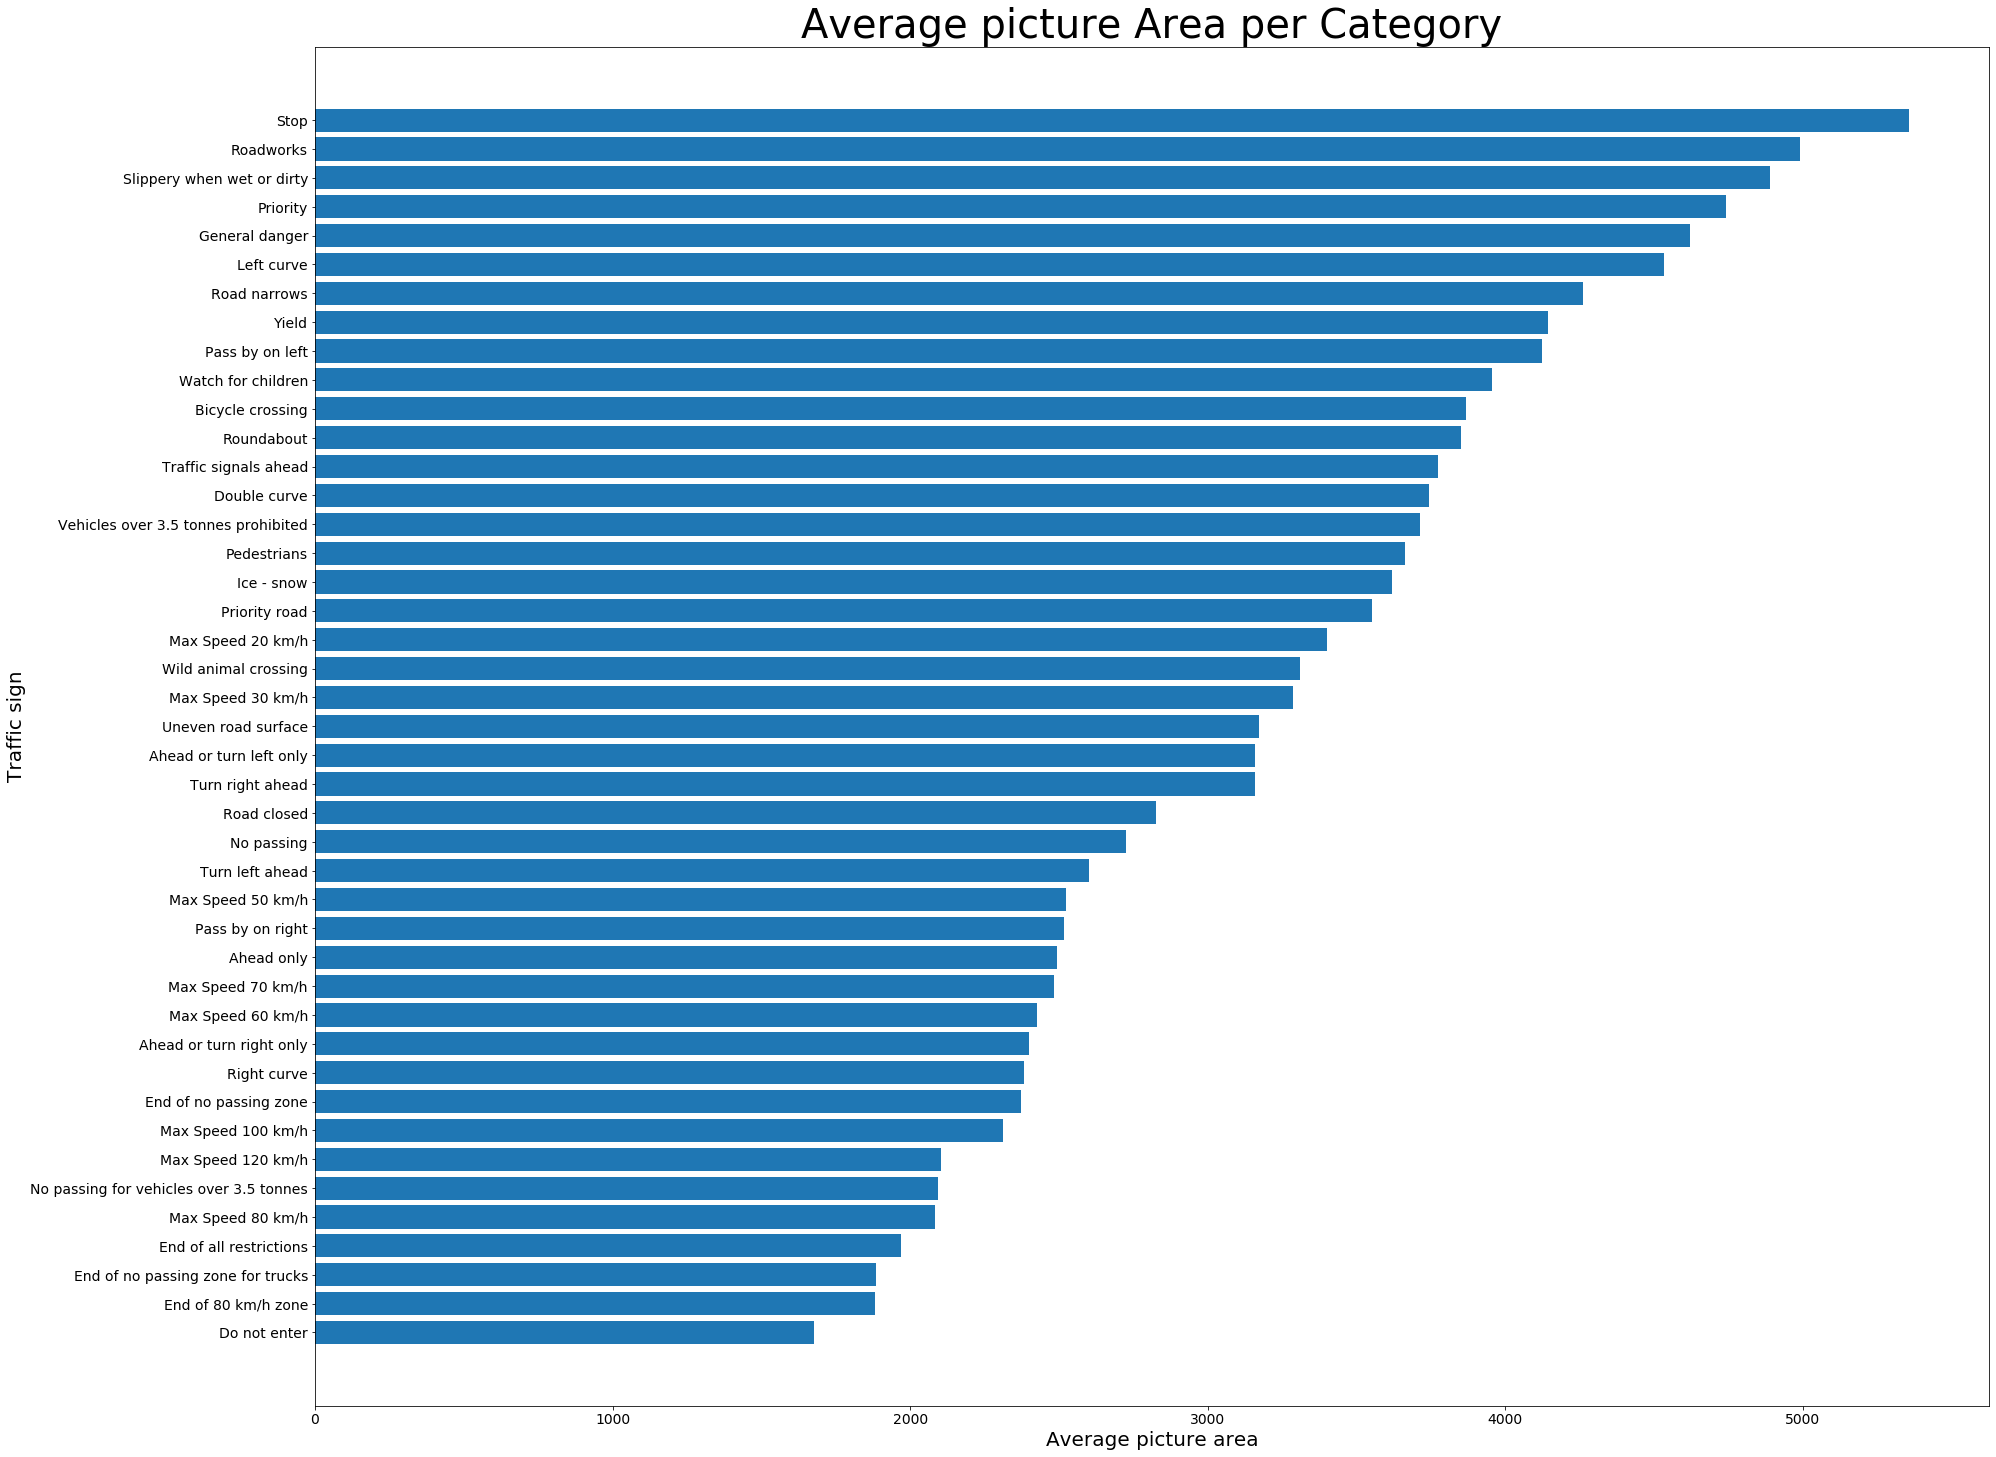

In [ ]:
fig = plt.figure(figsize=(30, 25))
ax=plt.subplot()

plt.barh(range(len(train_df_cat)), train_df_cat['Area'])

plt.title('Average picture Area per Category', fontsize=40)
plt.xlabel('Average picture area', fontsize = 20)
plt.ylabel('Traffic sign', fontsize = 20)

labels = [ class_names[i] for i in train_df_cat.index ]
ax.set_yticks(range(len(train_df_cat)))
ax.set_yticklabels(labels)

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

plt.savefig(cmt307g12_dir + "report/images/area_barplot.png")

plt.show()


### 1.2.3 Aspect ratio
<a class="anchor" id="1_2_3" name="1_2_3"></a>
##### [Return to index](#main_title)
<br/>

Confirm whether the majority of pictures have a **squared** shape (1:1 ratio when comparing height and width)

<Figure size 1800x1800 with 0 Axes>

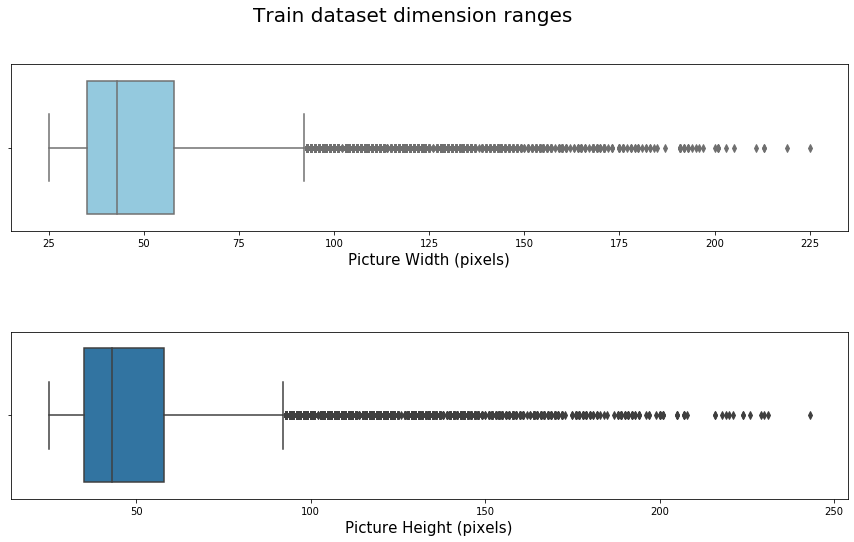

In [ ]:
fig = plt.figure(figsize = (25,25))
fig, (ax1, ax2) = plt.subplots(2, 1)

fig.set_figheight(8)
fig.set_figwidth(15)

sns.boxplot(x = train_df["Width"], ax = ax1, color = "skyblue")
sns.boxplot(x = train_df["Height"], ax = ax2)

ax1.set_xlabel("Picture Width (pixels)", fontsize=15)
ax2.set_xlabel("Picture Height (pixels)", fontsize=15)

fig.subplots_adjust(hspace=0.6)
fig.suptitle('Train dataset dimension ranges ', fontsize=20)

plt.show()

In [ ]:
print("Picture width median: ", train_df["Width"].median())
print("Picture height median: ", train_df["Height"].median())

Picture width median:  43.0
Picture height median:  43.0


In [ ]:
max_width = max(train_df["Width"])
max_height = max(train_df["Height"])
print("Widest picture size: ", max_width)
print("Highest picture size: ", max_height)

Widest picture size:  225
Highest picture size:  243


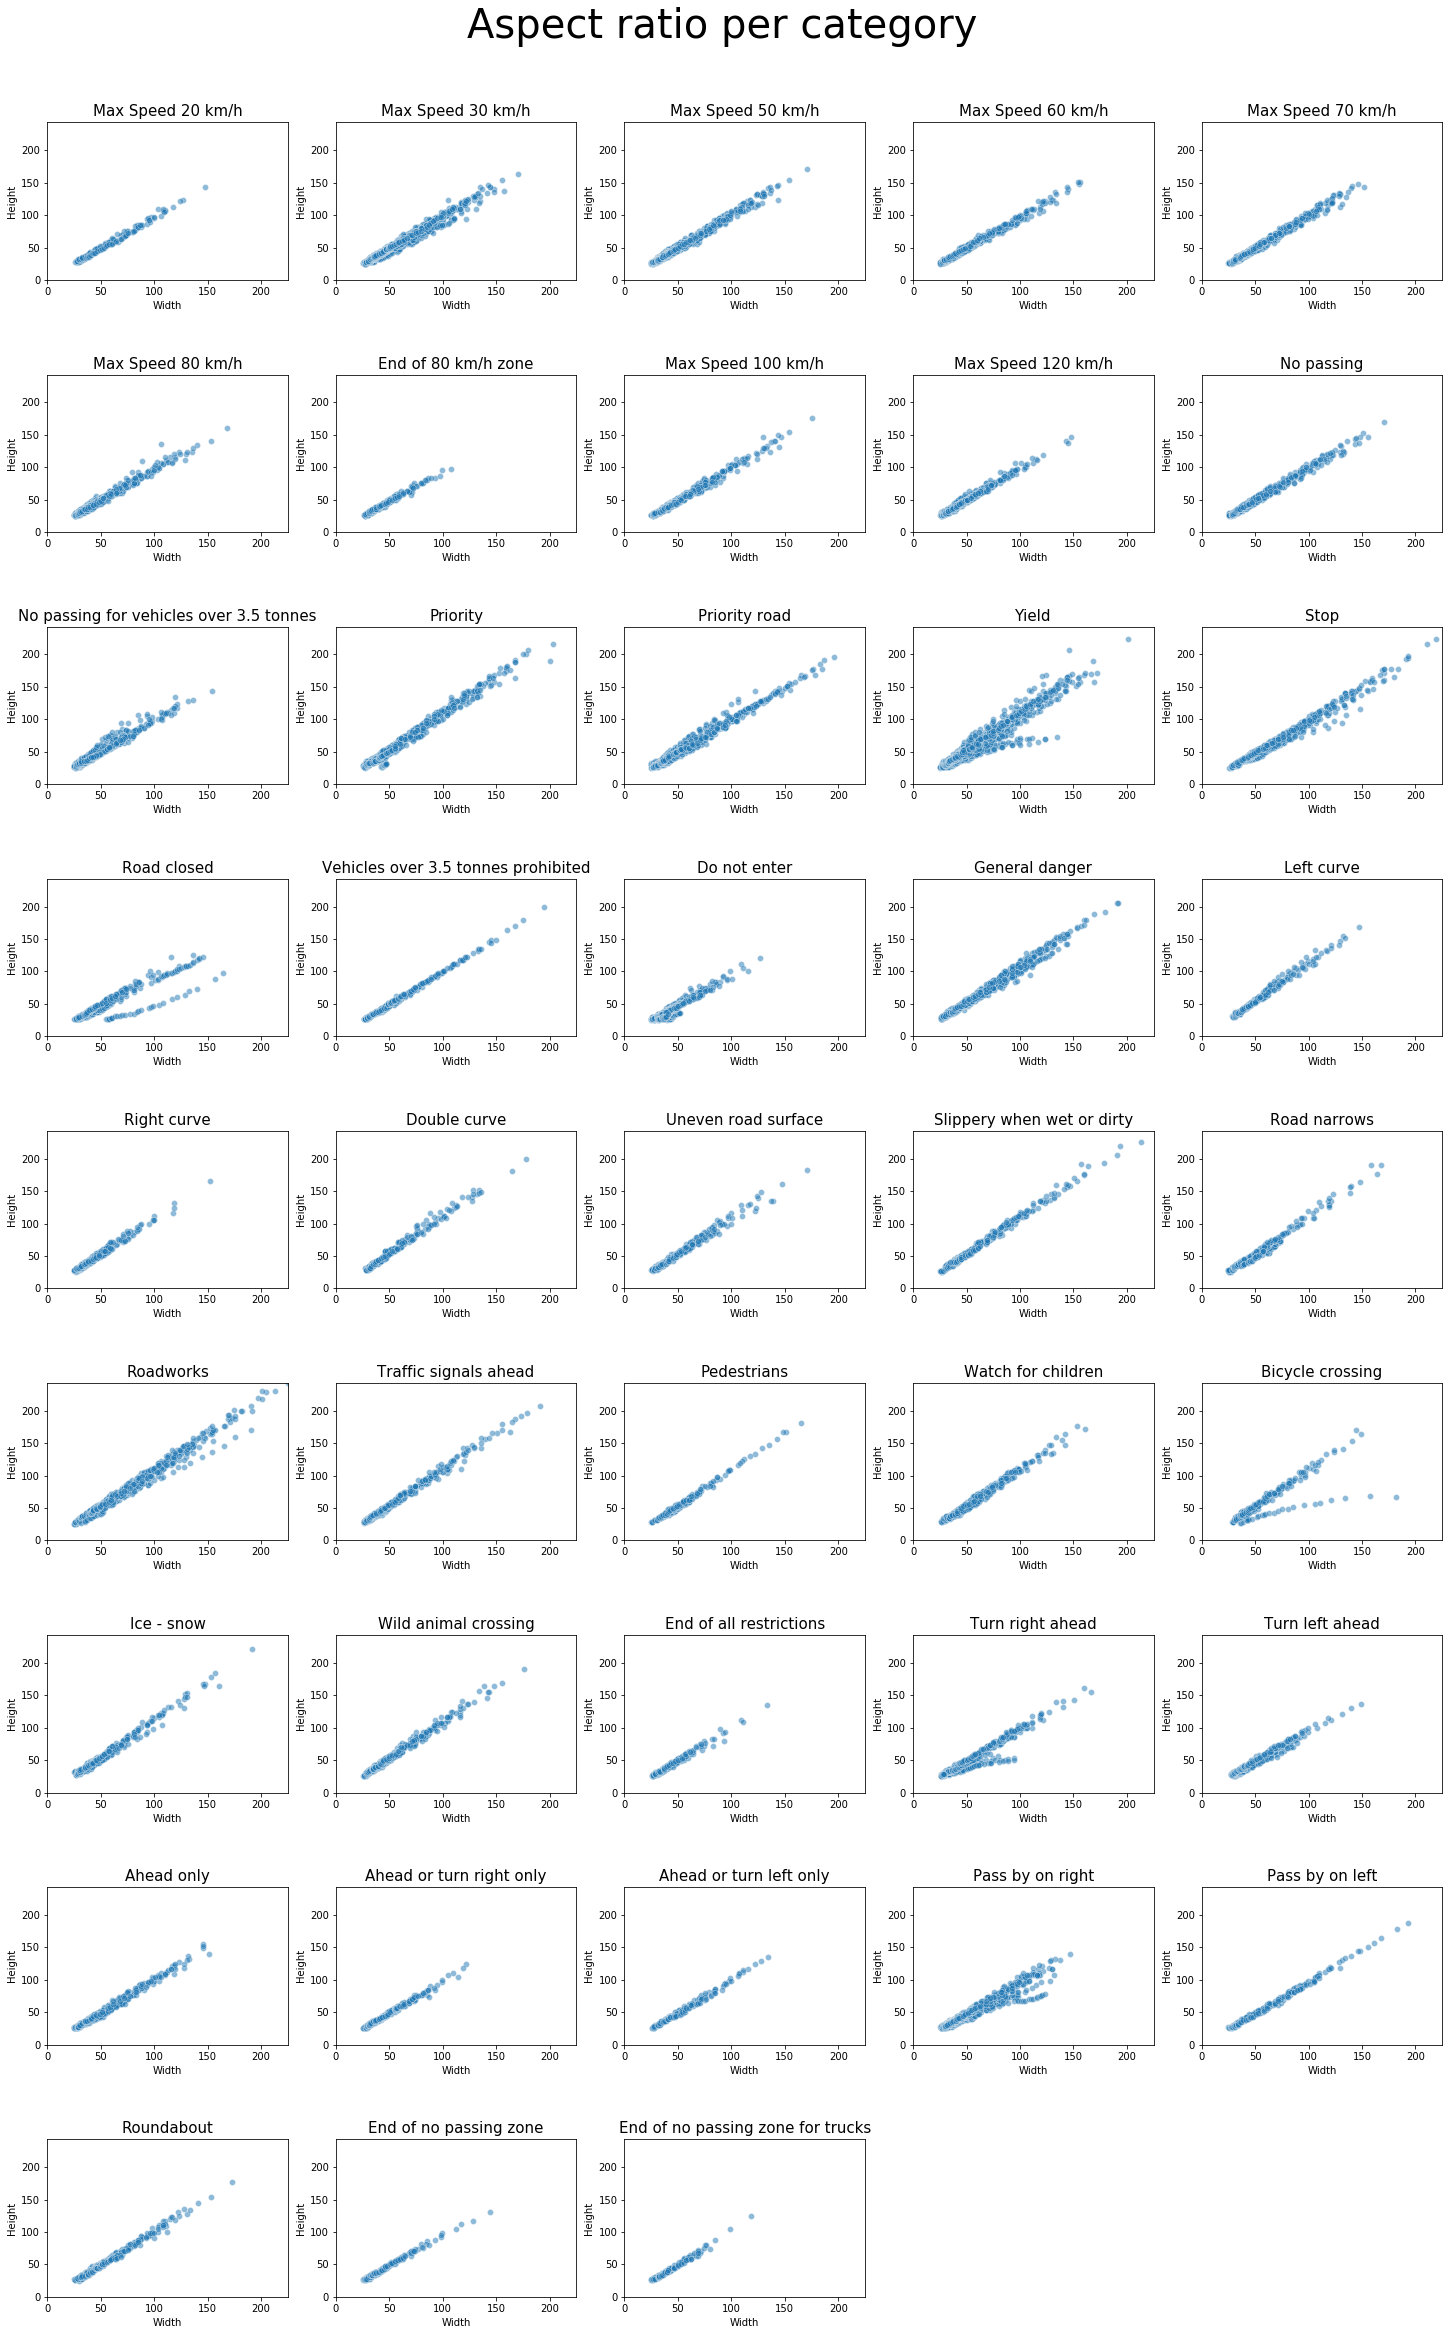

In [ ]:
# Create the main figure:
fig = plt.figure(figsize=(25,25))

# Create a collection of axes names for the following subplot:
axes = [category + "_ax" for category in class_names]

for i in range(len(class_names)) :
    
    axes[i] = fig.add_subplot(9, 5 , i+1)
        
    fig.set_figheight(40)
    #fig.set_figwidth(40)
    
    category = class_names[i]
    sns.scatterplot(x = "Width", y= "Height", data = train_df[train_df.ClassId == i] , alpha= .5)
    
    axes[i].set_xlim([0, max_width])
    axes[i].set_ylim([0, max_height])
    
    #axes[i].axis('equal')  
    axes[i].set_title(class_names[i], fontsize=15)

    
#fig.tight_layout(pad=10.0)
fig.subplots_adjust(hspace=0.6)

fig.suptitle("Aspect ratio per category", fontsize=40, y= 0.92)

plt.savefig(cmt307g12_dir + "report/images/aspect_ratio_per_category.png")

plt.show()   

### 1.2.4 Boxplot of picture intensity per category 
<a class="anchor" id="1_2_4" name="1_2_4"></a>
#### [Return to index](#main_title)
<br/>

Calculate the average pixel intensity from each picture using its numpy array (x_train) and store this data into a dataframe called df_pixels.

Create a dataframe from decoded train pictures: 
*x_train + y_train -> df_pixels*

In [ ]:
# Calculate the pixel intensity mean for each picture in the train dataset:
pic_means = [ picture.mean() for picture in x_train]

df_pixels = pd.DataFrame( list(zip(pic_means, y_train_names)), columns=['Picture avg', 'Category']  )

In [ ]:
df_pixels.head(5)

,Picture avg,Category
0,128.588506,Max Speed 20 km/h
1,129.371111,Max Speed 20 km/h
2,127.922593,Max Speed 20 km/h
3,126.164759,Max Speed 20 km/h
4,130.678125,Max Speed 20 km/h


Order aggregated values by the median before setting up a boxplot for categories:

In [ ]:
median_order = df_pixels.groupby(by=["Category"])["Picture avg"].median().iloc[::-1].index
median_order

Index(['Yield', 'Wild animal crossing', 'Watch for children',
       'Vehicles over 3.5 tonnes prohibited', 'Uneven road surface',
       'Turn right ahead', 'Turn left ahead', 'Traffic signals ahead', 'Stop',
       'Slippery when wet or dirty', 'Roundabout', 'Roadworks', 'Road narrows',
       'Road closed', 'Right curve', 'Priority road', 'Priority',
       'Pedestrians', 'Pass by on right', 'Pass by on left',
       'No passing for vehicles over 3.5 tonnes', 'No passing',
       'Max Speed 80 km/h', 'Max Speed 70 km/h', 'Max Speed 60 km/h',
       'Max Speed 50 km/h', 'Max Speed 30 km/h', 'Max Speed 20 km/h',
       'Max Speed 120 km/h', 'Max Speed 100 km/h', 'Left curve', 'Ice - snow',
       'General danger', 'End of no passing zone for trucks',
       'End of no passing zone', 'End of all restrictions',
       'End of 80 km/h zone', 'Double curve', 'Do not enter',
       'Bicycle crossing', 'Ahead or turn right only',
       'Ahead or turn left only', 'Ahead only'],
      dtype=

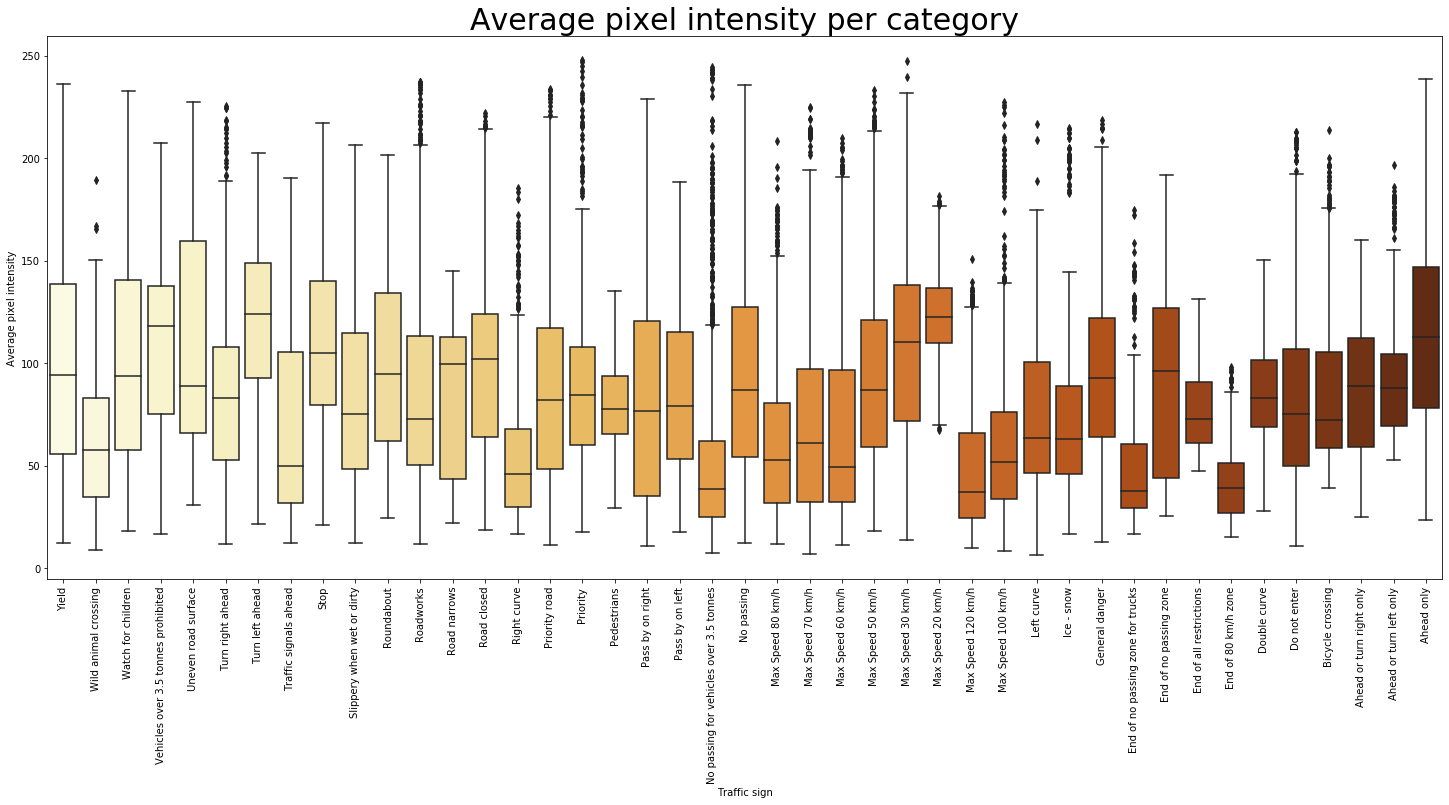

In [ ]:
fig = plt.figure(figsize=(25, 10))
ax=plt.subplot()

sns.boxplot(x = "Category", y = "Picture avg", palette = "YlOrBr", data = df_pixels, order = median_order)
plt.title('Average pixel intensity per category', fontsize=30)
plt.xlabel('Traffic sign')
plt.ylabel('Average pixel intensity')

#labels = [ class_names[i] for i in train_counts.index ]
#ax.set_xticks(range(len(train_counts)))
#ax.set_xticklabels(labels, rotation = 90)

plt.xticks(rotation = 90)

plt.savefig(cmt307g12_dir + "report/images/pixel_intensity_barplot.png")

plt.show()

### 1.2.5 Distribution of pixel intensity per category 
<a class="anchor" id="1_2_5" name="1_2_5"></a>
#### [Return to index](#main_title)
<br/>

Distribution of picture's average intensity per category

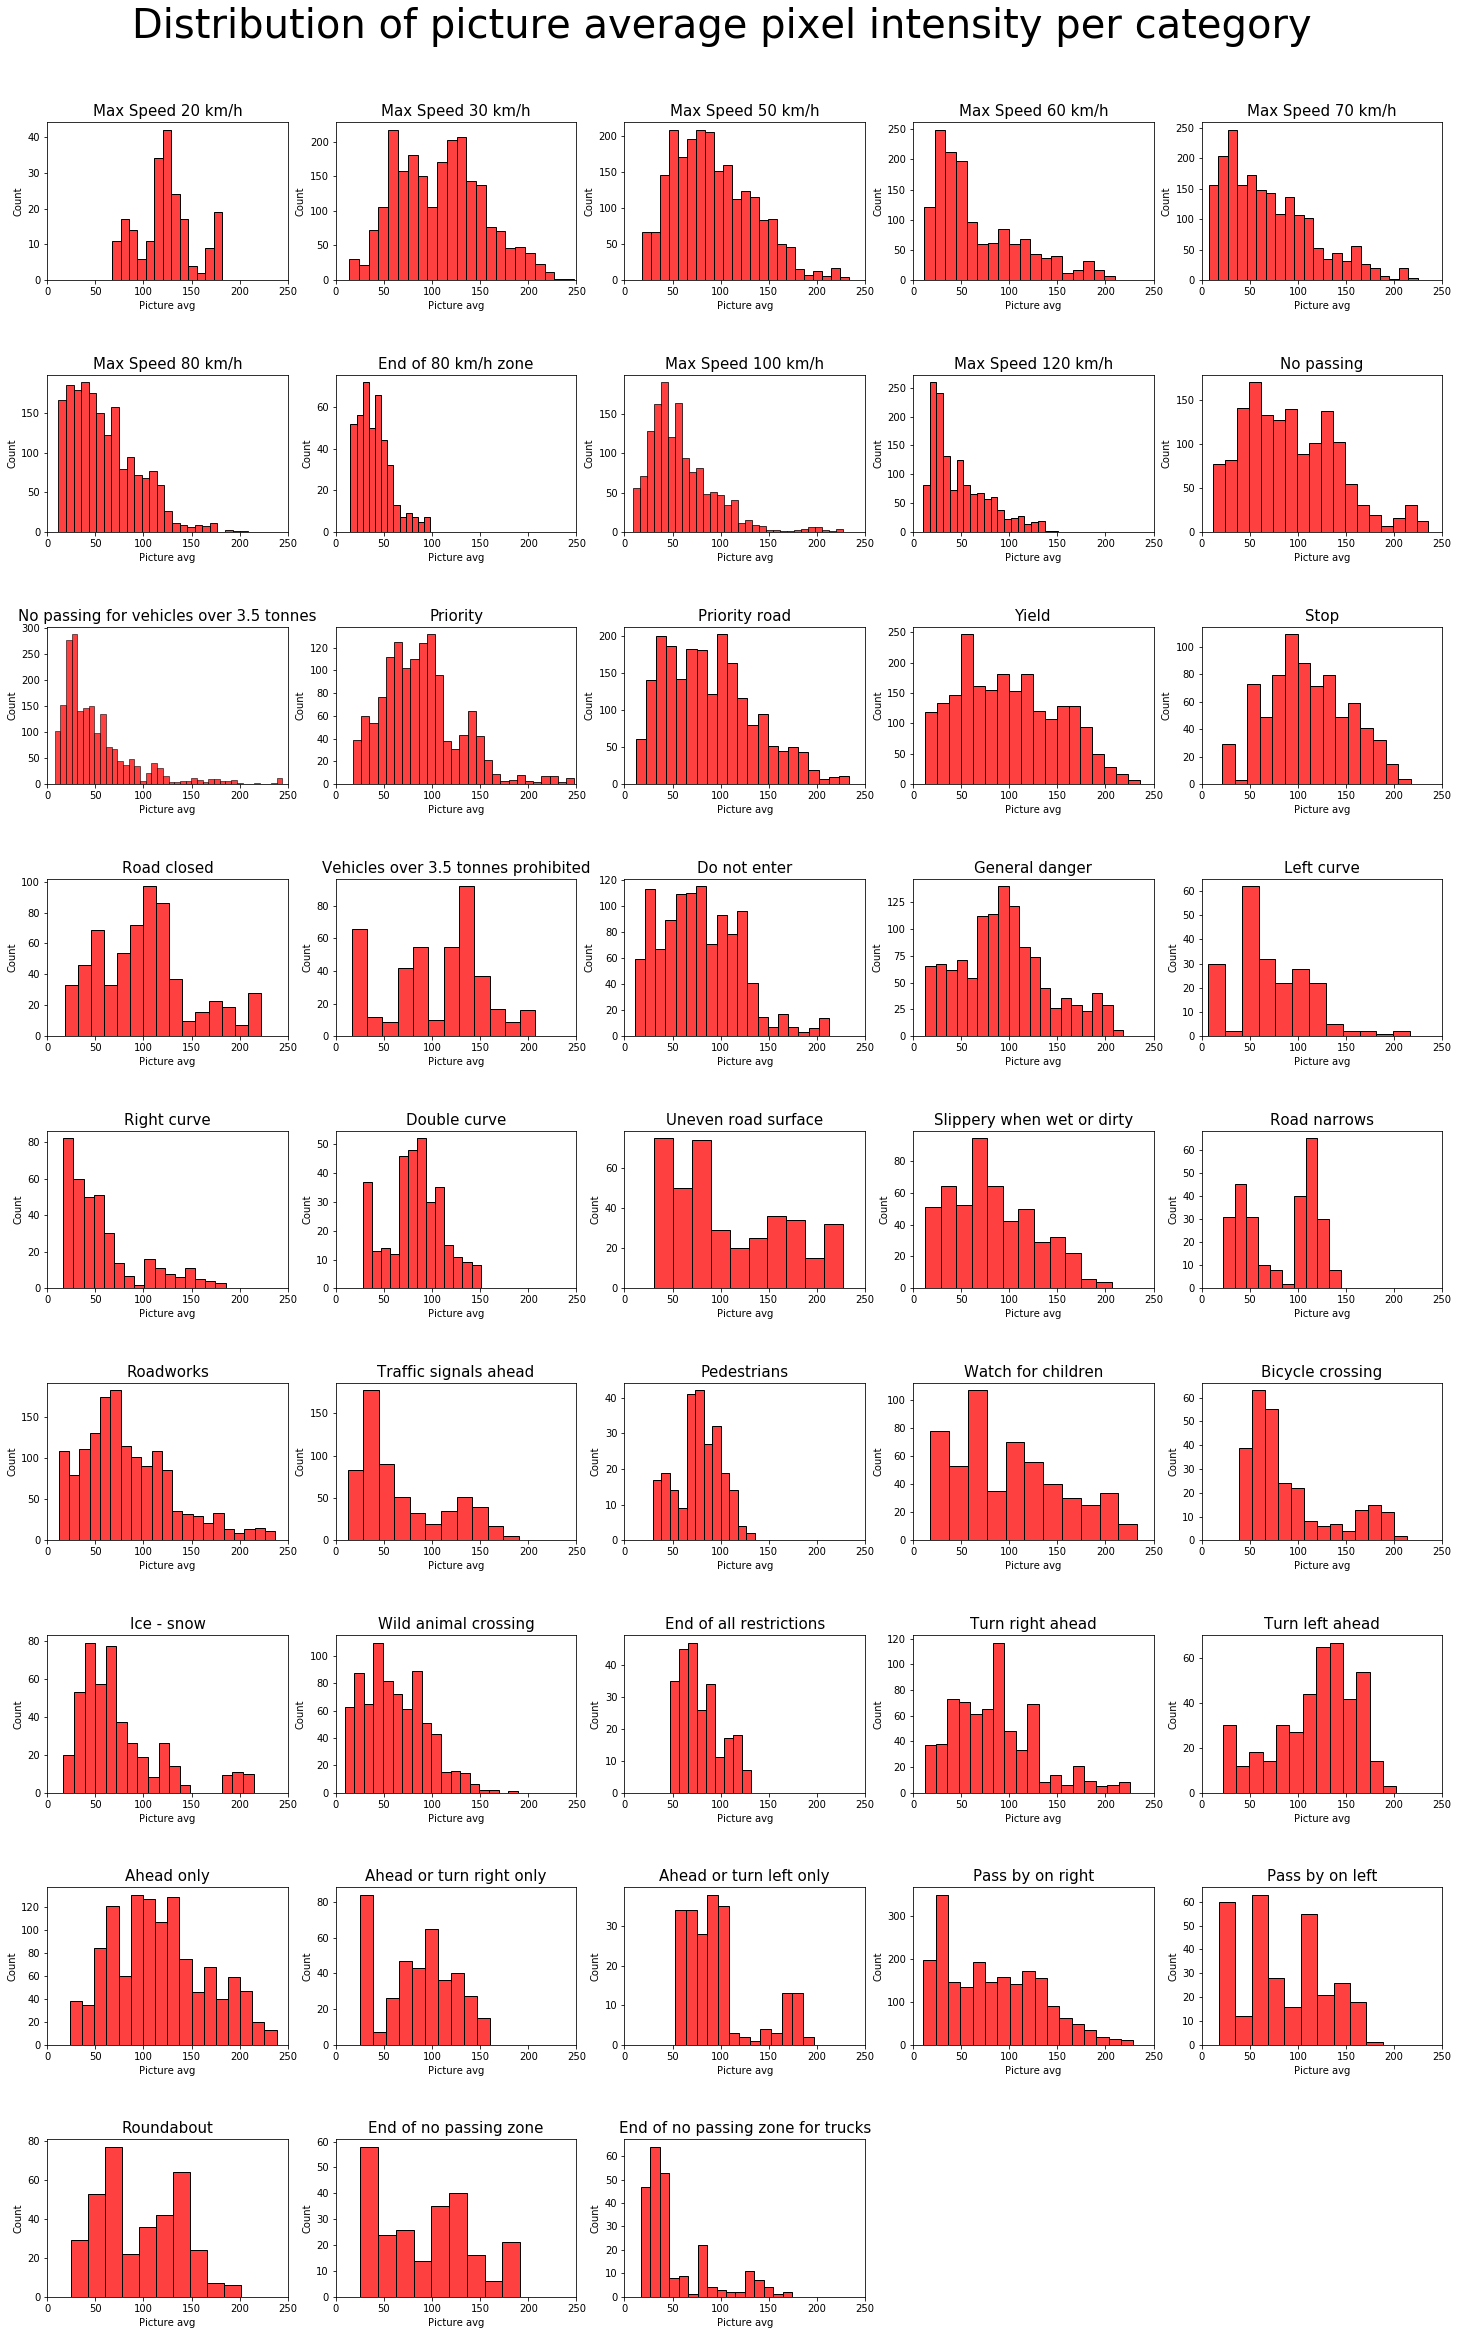

In [ ]:
# Create the main figure:
fig = plt.figure(figsize=(25,25))

# Create a collection of axes names for the following subplot:
axes = [category + "_ax" for category in class_names]

for i in range(len(class_names)) :
    
    axes[i] = fig.add_subplot(9, 5 , i+1)   
    fig.set_figheight(40)
    
    category = class_names[i]
    values = df_pixels[df_pixels.Category == category]["Picture avg"]
    
    #axes[i].hist([values], bins = 10, facecolor = 'red')
    sns.histplot(values, color = "red")
    
    axes[i].set_xlim([0, 250])
    axes[i].set_title(class_names[i], fontsize=15)
    

fig.subplots_adjust(hspace=0.6)
fig.suptitle("Distribution of picture average pixel intensity per category", fontsize=40, y= 0.92)
plt.savefig(cmt307g12_dir + "report/images/pixel_intensity_distribution.png")

plt.show()     

***
# 2 Preprocessing + Literature review 
<a class="anchor" id="2" name="2"></a>
#### [Return to index](#main_title)

## 2.1 Data augmentation 
<a class="anchor" id="2_2" name="2_2"></a>
#### [Return to index](#main_title)

When performing exploratory data analysis in section 1, we found that the dataset was highly unbalanced looking at the number of pictures per category, having the minority categories around 200 pictures and the most populated, more than 2000. In this section we are creating additional pictures to populate all categories until they hit the same amount as the most populated one.

### 2.1.1 Define transformation methods 
<a class="anchor" id="2_1_1" name="2_1_1"></a>
#### [Return to index](#main_title)


We are using the module *ImageDataGenerator* from Tensorflow to create an object that performs image manipulation such as rotating and shearing the picture, performing a translation on both x and y axis, and zooming the picture in or out.

The scope is to increase the number of pictures in each category, until the total number of pictures equals the most populated category (category number two with 2250 pictures).

Details on Tensorflow's **.apply_transform** method, from the ImageDataGenerator object:

**Arguments**

- x: 3D tensor, single image.
- transform_parameters: Dictionary with string - parameter pairs describing the transformation. Currently, the following parameters from the dictionary are used:

- 'theta': Float. Rotation angle in degrees.
- 'tx': Float. Shift in the x direction.
- 'ty': Float. Shift in the y direction.
- 'shear': Float. Shear angle in degrees.
- 'zx': Float. Zoom in the x direction.
- 'zy': Float. Zoom in the y direction.
- 'flip_horizontal': Boolean. Horizontal flip.
- 'flip_vertical': Boolean. Vertical flip.
- 'channel_shift_intensity': Float. Channel shift intensity.
- 'brightness': Float. Brightness shift intensity.

**Returns**

A transformed version of the input (same shape).

In [ ]:
def RandomOperation():
    
    '''
    Creates a dictionary where the key is a single or a pair of data augmentation operations, alongside its corresponding
    values. Both the operation and the values are randomly generated, within a range of values described below.
    
    '''
    
    operation_list = {
    'theta' : {'min':-45.0, 'max':45.0},
    ('tx','ty') : {'min':-5.0, 'max':5.0},
    'shear' : {'min':-10.0, 'max':10.0},
    ('zx','zy') : {'min':0.5, 'max':0.9}
    #,'brightness' : {'min':0.1, 'max':0.4}
    }

    operation_choice = random.choice(list(operation_list.keys()))
    max_val = operation_list[operation_choice]['max']
    min_val = operation_list[operation_choice]['min']

    if not isinstance(operation_choice, tuple):
        operation_choice = [operation_choice]

    operation_values = [random.uniform(min_val, max_val) for operation in operation_choice]

    return dict(zip(operation_choice, operation_values))


# Test the function:
RandomOperation()

{'tx': 1.7960326804437576, 'ty': -1.011305197293686}

### 2.1.2 Data augmentation visualization 
<a class="anchor" id="2_1_2" name="2_1_2"></a>
#### [Return to index](#main_title)


Perform a test to see how the data augmentation operator works:

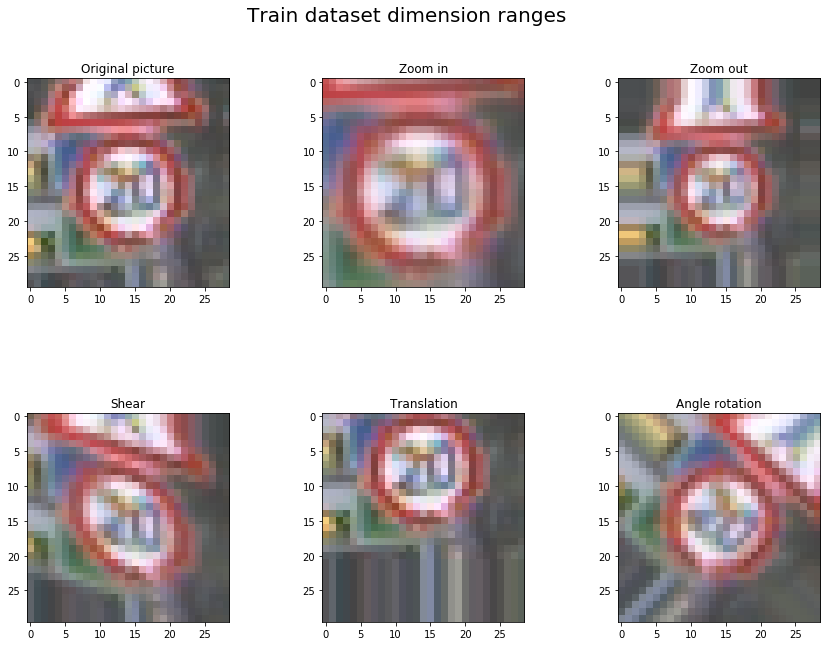

In [ ]:
# Create generator object (from tensorflow.keras.preprocessing.image import ImageDataGenerator):
aug = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode="nearest")

first_picture = x_train[0]

# Plot data-augmented pictures

fig = plt.figure(figsize = (10,20))

fig.set_figheight(10)
fig.set_figwidth(15)

plt.subplot(2, 3, 1)
plt.imshow(x_train[0], cmap = 'gray')
plt.title('Original picture')

plt.subplot(2, 3, 2)
picture = aug.apply_transform(x= x_train[0], transform_parameters={'zx' : 0.7, 'zy' : 0.7})
plt.imshow(picture, cmap = 'gray')
plt.title('Zoom in')

plt.subplot(2, 3, 3)
picture = aug.apply_transform(x= x_train[0], transform_parameters={'zx' : 1.2, 'zy' : 1.2})
plt.imshow(picture, cmap = 'gray')
plt.title('Zoom out')


plt.subplot(2, 3, 4)
picture = aug.apply_transform(x= x_train[0], transform_parameters={'shear' : 20})
plt.imshow(picture, cmap = 'gray')
plt.title('Shear')

plt.subplot(2, 3, 5)
picture = aug.apply_transform(x= x_train[0], transform_parameters={'tx' : 8})
plt.imshow(picture, cmap = 'gray')
plt.title('Translation')

plt.subplot(2, 3, 6)
picture = aug.apply_transform(x= x_train[0], transform_parameters={'theta' : 45})
plt.imshow(picture, cmap = 'gray')
plt.title('Angle rotation')


fig.subplots_adjust(hspace=0.6)
fig.suptitle('Train dataset dimension ranges ', fontsize=20)

plt.show()

### 2.1.3 Increase the training dataset 
<a class="anchor" id="2_1_3" name="2_1_3"></a>
#### [Return to index](#main_title)


We are ready to start creating new pictures by randomly selecting a picture and applying a random transformation, as shown in the section above.

At this point, the train and test dataset, together with their label objects, **are still lists**, so these can be appended to receive new instances:

In [ ]:
print("The object x_train is of type ", type(x_train), ", containing ", len(x_train), " elements.")
print("The object y_train is of type ", type(y_train), ", containing ", len(y_train), " elements.")
print("The object x_test is of type ", type(x_test), ", containing ", len(x_test), " elements.")
print("The object y_test is of type ", type(y_test), ", containing ", len(y_test), " elements.")
print("The category with the biggest amount of pictures has got ", largest_amount, " elements.")

The object x_train is of type  <class 'list'> , containing  39209  elements.
The object y_train is of type  <class 'list'> , containing  39209  elements.
The object x_test is of type  <class 'list'> , containing  12630  elements.
The object y_test is of type  <class 'list'> , containing  12630  elements.
The category with the biggest amount of pictures has got  2250  elements.


Start creating additional pictures using the above data-augmentation strategy:

In [ ]:
# Look for checkpoint files before attemping to start the data augmentation process:

if "x_train_augmented.obj" in os.listdir(numpy_dir) and "y_train_augmented.obj" in os.listdir(numpy_dir):
    
    x_train = LoadPickleObject(numpy_dir + "x_train_augmented.obj")
    y_train = LoadPickleObject(numpy_dir + "y_train_augmented.obj")
    y_train_names = [class_names[x] for x in y_train]
    
else:
    
    for cat_num in range(43):

        # Create a series to filter out pictures from each category and retrieve their indexes within the train dataset.
        # We are using the dataframe we built in section 0.3.5 containing all info from the training pictures (train_df).
        # Series index: Location in x_train (x_train index for each picture)

        df_cat = train_df[train_df.ClassId == cat_num]['ClassId']

        # For this category, we create a new picture until hitting the number of pictures of the most populated category (2): 
        for i in range(largest_amount - len(df_cat)):

                # Pick up a random picture from this category:
                random_picture = x_train[random.choice(df_cat.index)]

                # Create a new picture using data augmentation:
                random_picture_transformed = aug.apply_transform(random_picture, 
                                                                 transform_parameters=RandomOperation())

                # Append this picture to the training dataset, alongside its label to the label objects:
                x_train.append(random_picture_transformed)
                y_train.append(cat_num)
                y_train_names.append(class_names[cat_num])


    # In the end, create a checkpoint file:

    SavePickleObject(numpy_dir + "x_train_augmented.obj", x_train)
    SavePickleObject(numpy_dir + "y_train_augmented.obj", y_train)

Check that the x_train and y_train objects have grown in size:

In [ ]:
print("Following Data Augmentation,\n")
print("The object x_train is of type ", type(x_train), ", containing ", len(x_train), " elements.")
print("The object y_train is of type ", type(y_train), ", containing ", len(y_train), " elements.")
print("The object x_test is of type ", type(x_test), ", containing ", len(x_test), " elements.")
print("The object y_test is of type ", type(y_test), ", containing ", len(y_test), " elements.")

Following Data Augmentation,

The object x_train is of type  <class 'list'> , containing  96750  elements.
The object y_train is of type  <class 'list'> , containing  96750  elements.
The object x_test is of type  <class 'list'> , containing  12630  elements.
The object y_test is of type  <class 'list'> , containing  12630  elements.


Visualize one of the newly created pictures:

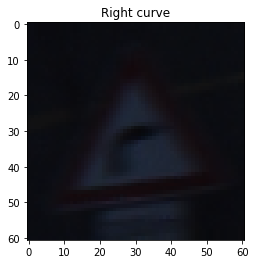

In [ ]:
PlotPicture(x_train, y_train_names, 59425)

### 2.1.4 Visualize the balanced dataset
<a class="anchor" id="2_1_4" name="2_1_4"></a>
#### [Return to index](#main_title)


Repeat barplot analysis from section [1.2.1](#1_2_1) to confirm that the number of pictures is now balanced:

In [ ]:
# Train summary file:

train_summary_balanced = dict.fromkeys(["Width", "Height", "ClassId"], [])
widths = []
heights = []

for picture in x_train:
    widths.append(picture.shape[0])
    heights.append(picture.shape[1])

train_summary_balanced["Width"] = widths
train_summary_balanced["Height"] = heights
train_summary_balanced["ClassId"] = y_train

train_df_balanced = pd.DataFrame( train_summary_balanced)

#train_summary_df.to_csv(data_dir + "train_summary.csv", index = False)
train_df_balanced.head(5)

,Width,Height,ClassId
0,30,29,0
1,30,30,0
2,30,30,0
3,31,31,0
4,32,30,0


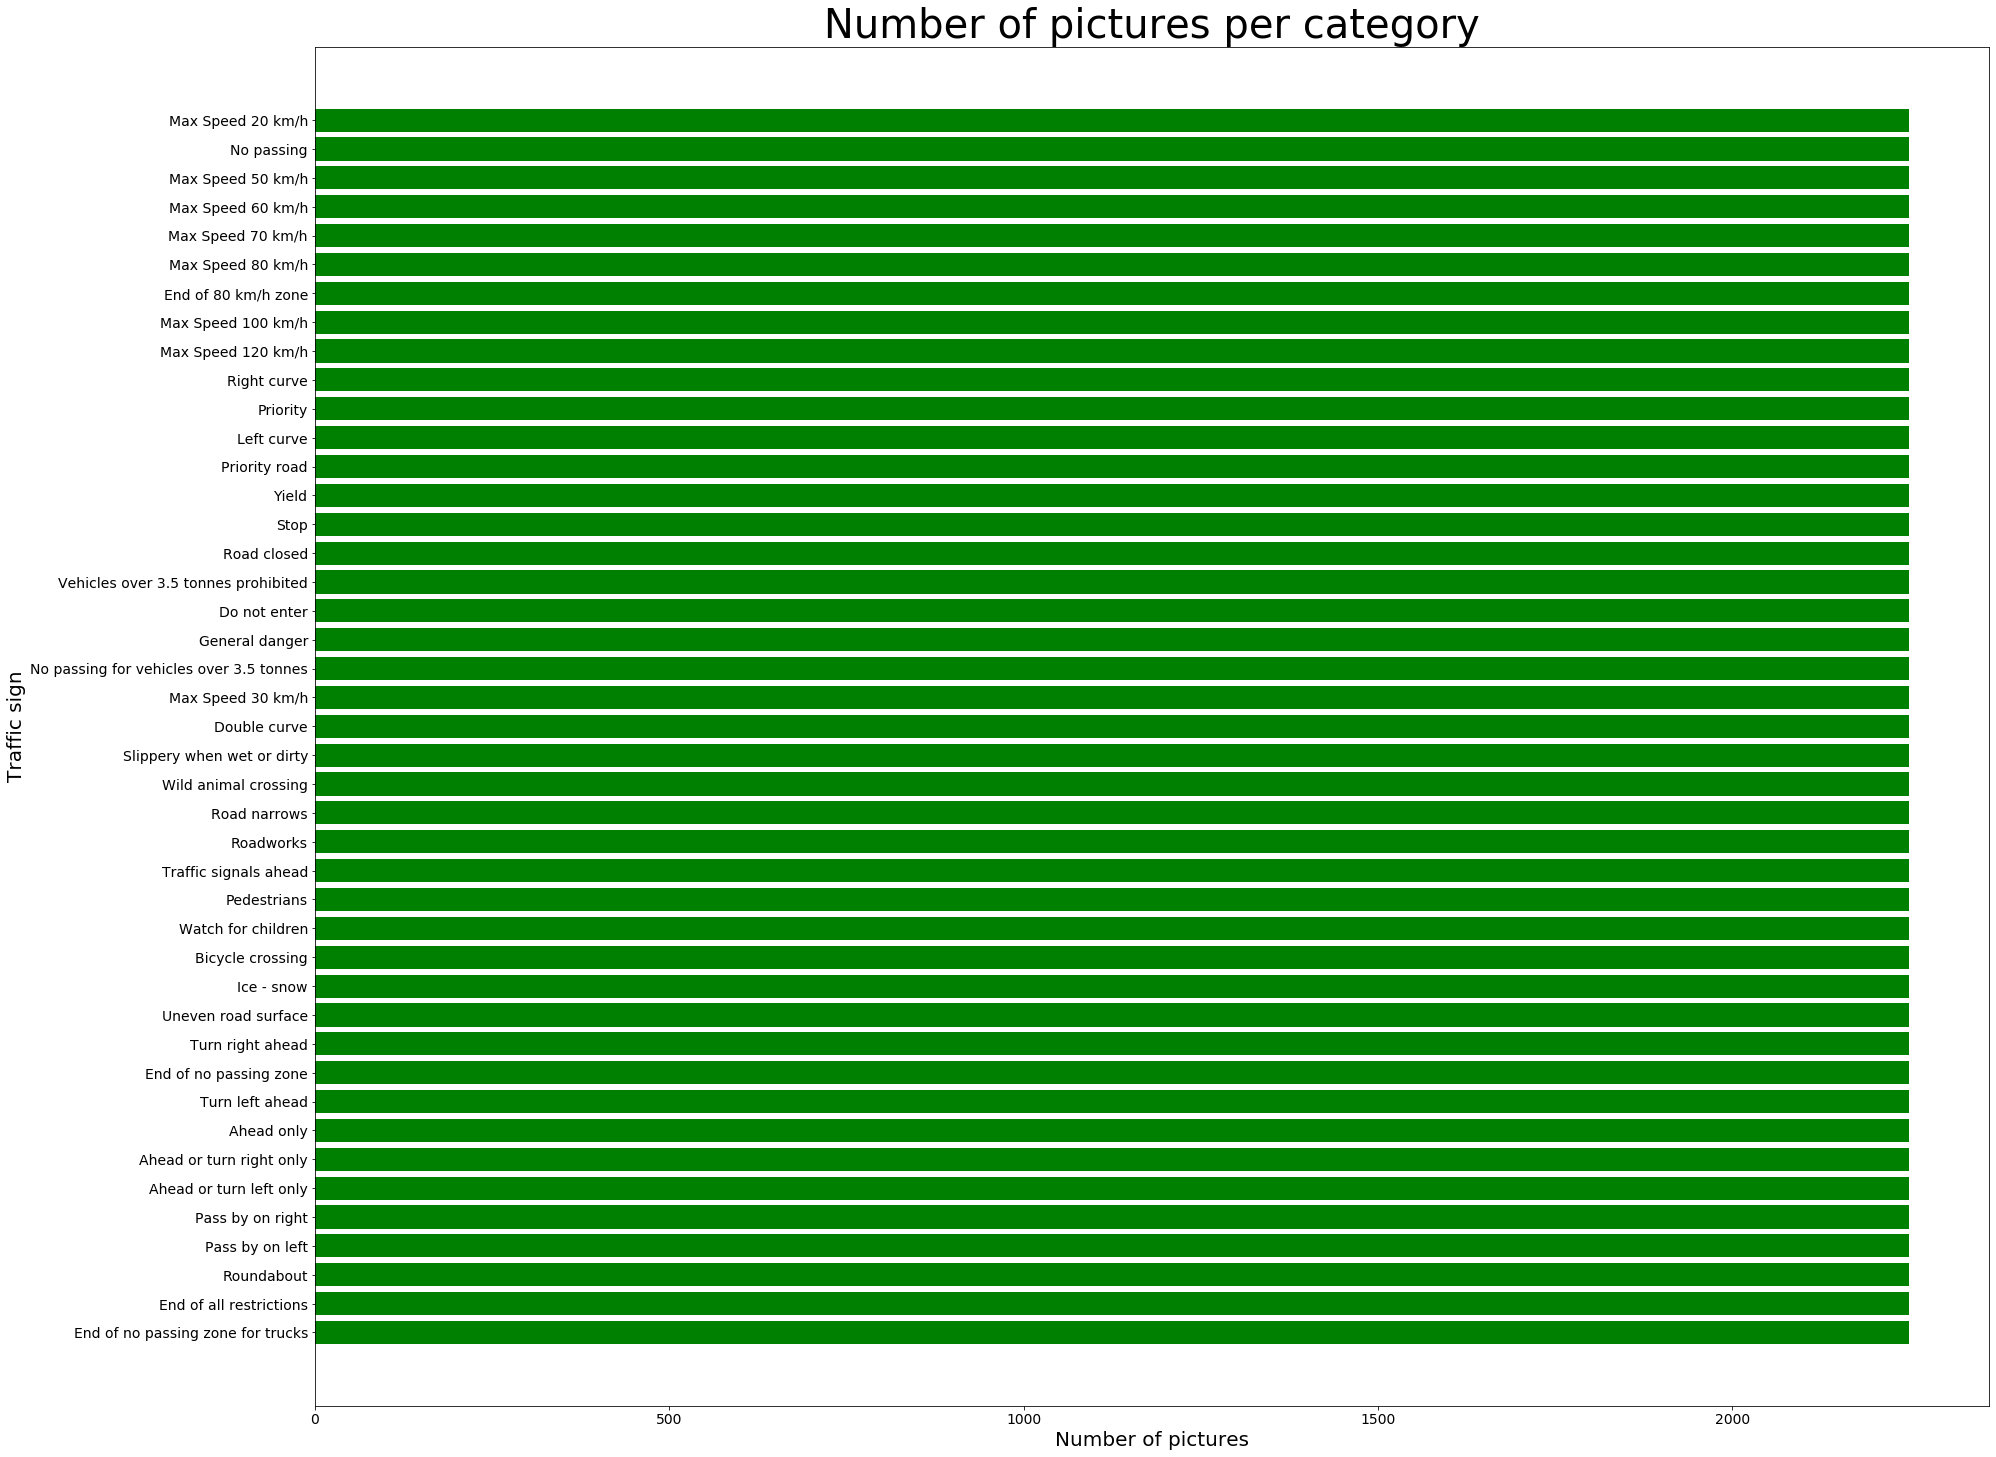

In [ ]:
train_counts_balanced = train_df_balanced.ClassId.value_counts().sort_values(ascending = True)

fig = plt.figure(figsize=(30, 25))
ax=plt.subplot()

plt.barh(range(len(train_counts_balanced)), train_counts_balanced.values, color = 'green')
plt.title('Number of pictures per category', fontsize=40)
plt.xlabel('Number of pictures', fontsize = 20)
plt.ylabel('Traffic sign', fontsize = 20)

labels = [ class_names[i] for i in train_counts_balanced.index ]

ax.set_yticks(range(len(train_counts_balanced)))
ax.set_yticklabels(labels)

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

#plt.savefig(cmt307g12_dir + "report/images/num_pictures_barplot.png")

plt.show()

### 2.1.5 Convert dataset objects to numpy arrays
<a class="anchor" id="2_1_5" name="2_1_5"></a>
#### [Return to index](#main_title)


Now that the training objects have been appended with new items and we are happy with the overall proportion, we are ready to convert these objects from **lists** to **numpy arrays** for the following steps of the project.

x_test could have been converted from step 1, as it's never been augmented, however all numpy conversions are performed at this step for consistency.

In [ ]:
x_train = np.array(x_train, dtype = object)
x_test = np.array(x_test, dtype = object)

y_train = np.array(y_train)
y_test = np.array(y_test)

# Alternative way to convert to numpy array:
#x_train = np.concatenate(x_train, axis=0, out=None, dtype=None, casting="same_kind")

## 2.2 Dataset pre-processing 
<a class="anchor" id="2_2" name="2_2"></a>
#### [Return to index](#main_title)

In this section we normalize the dataset translating pixel intensity from a 0-255 to 0.0-1.0 scale. Then resize all pictures from train and test set to the same size, defined by the parameters img_height and img_width.

### 2.2.1 Resize pictures 
<a class="anchor" id="2_2_1" name="2_2_1"></a>
#### [Return to index](#main_title)


Define **resize** parameters:

In [ ]:
# Target resize parameters:
img_width = 30
img_height = 30
channels = 3

***

**x_train**: resize trainning pictues

Visualize native train pictures:

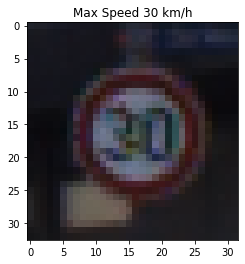

SHAPE:  (33, 32, 3)


array([[[32, 35, 43],
        [31, 33, 40],
        [31, 32, 41],
        ...,
        [21, 26, 38],
        [18, 25, 38],
        [17, 25, 38]],

       [[24, 26, 32],
        [25, 26, 31],
        [26, 26, 32],
        ...,
        [37, 42, 56],
        [33, 40, 54],
        [29, 37, 51]],

       [[23, 24, 30],
        [24, 24, 30],
        [24, 24, 31],
        ...,
        [42, 48, 66],
        [37, 45, 62],
        [35, 43, 60]],

       ...,

       [[32, 30, 32],
        [29, 27, 28],
        [25, 22, 24],
        ...,
        [28, 28, 32],
        [32, 30, 34],
        [31, 30, 34]],

       [[24, 23, 25],
        [26, 25, 27],
        [25, 24, 26],
        ...,
        [29, 29, 34],
        [30, 30, 34],
        [30, 30, 33]],

       [[21, 21, 23],
        [23, 23, 25],
        [25, 25, 27],
        ...,
        [30, 30, 35],
        [30, 31, 35],
        [32, 32, 36]]], dtype=uint8)

In [ ]:
index = 1535

PlotPicture(x_train, y_train_names, index)
print('SHAPE: ', x_train[index].shape)
x_train[index]

**Normalize** data before picture resizing

In [ ]:
# Normalize data 0 -- 1
x_train = x_train/255

# Round up to two decimal places after normalization:
for i in range(len(x_train)):
    x_train[i] = np.around(x_train[i], decimals = 2)

Visualize **train** pictures after normalization:

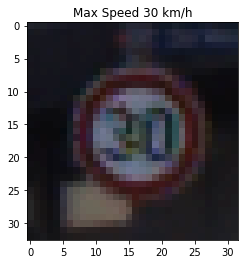

SHAPE:  (33, 32, 3)


array([[[0.13, 0.14, 0.17],
        [0.12, 0.13, 0.16],
        [0.12, 0.13, 0.16],
        ...,
        [0.08, 0.1 , 0.15],
        [0.07, 0.1 , 0.15],
        [0.07, 0.1 , 0.15]],

       [[0.09, 0.1 , 0.13],
        [0.1 , 0.1 , 0.12],
        [0.1 , 0.1 , 0.13],
        ...,
        [0.15, 0.16, 0.22],
        [0.13, 0.16, 0.21],
        [0.11, 0.15, 0.2 ]],

       [[0.09, 0.09, 0.12],
        [0.09, 0.09, 0.12],
        [0.09, 0.09, 0.12],
        ...,
        [0.16, 0.19, 0.26],
        [0.15, 0.18, 0.24],
        [0.14, 0.17, 0.24]],

       ...,

       [[0.13, 0.12, 0.13],
        [0.11, 0.11, 0.11],
        [0.1 , 0.09, 0.09],
        ...,
        [0.11, 0.11, 0.13],
        [0.13, 0.12, 0.13],
        [0.12, 0.12, 0.13]],

       [[0.09, 0.09, 0.1 ],
        [0.1 , 0.1 , 0.11],
        [0.1 , 0.09, 0.1 ],
        ...,
        [0.11, 0.11, 0.13],
        [0.12, 0.12, 0.13],
        [0.12, 0.12, 0.13]],

       [[0.08, 0.08, 0.09],
        [0.09, 0.09, 0.1 ],
        [0.1 , 0

In [ ]:
index = 1535

PlotPicture(x_train, y_train_names, index)
print('SHAPE: ', x_train[index].shape)
x_train[index]

Resize **x_train**

In [ ]:
if "x_train_resized.npy" in os.listdir(numpy_dir):
    x_train = np.load(numpy_dir + "x_train_resized.npy", allow_pickle = True)

else:

  # Resize images:
    x_train = np.array([ resize(image, (img_width, img_height)) for image in x_train])

  # Round up to two decimal places:
    for i in range(len(x_train)):
        x_train[i] = np.around(x_train[i], decimals = 2)


    np.save(numpy_dir + "x_train_resized.npy" , x_train)

**Note**: Resized x_train pictures are not yet saved to checkpoint file as they still need to be split between train and validation sets.

Visualize **training** pictures after resizing:

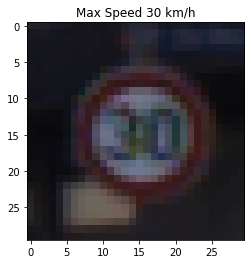

SHAPE:  (30, 30, 3)


array([[[0.13, 0.14, 0.17],
        [0.12, 0.13, 0.16],
        [0.12, 0.13, 0.16],
        ...,
        [0.09, 0.1 , 0.16],
        [0.07, 0.1 , 0.15],
        [0.07, 0.1 , 0.15]],

       [[0.09, 0.1 , 0.13],
        [0.1 , 0.1 , 0.12],
        [0.1 , 0.1 , 0.13],
        ...,
        [0.15, 0.17, 0.23],
        [0.13, 0.16, 0.22],
        [0.12, 0.15, 0.21]],

       [[0.09, 0.09, 0.12],
        [0.09, 0.09, 0.12],
        [0.09, 0.09, 0.12],
        ...,
        [0.15, 0.17, 0.25],
        [0.14, 0.17, 0.23],
        [0.13, 0.16, 0.23]],

       ...,

       [[0.13, 0.13, 0.13],
        [0.11, 0.11, 0.11],
        [0.09, 0.08, 0.09],
        ...,
        [0.11, 0.11, 0.13],
        [0.13, 0.12, 0.13],
        [0.12, 0.12, 0.13]],

       [[0.1 , 0.09, 0.1 ],
        [0.1 , 0.1 , 0.11],
        [0.09, 0.09, 0.1 ],
        ...,
        [0.11, 0.11, 0.13],
        [0.12, 0.12, 0.13],
        [0.12, 0.12, 0.13]],

       [[0.08, 0.08, 0.09],
        [0.09, 0.09, 0.1 ],
        [0.1 , 0

In [ ]:
# Test x_train after resizing
index = 1535

PlotPicture(x_train, y_train_names, index)
print('SHAPE: ', x_train[index].shape)
x_train[index]

***

Resize **x_test** --> **X_test** (final version)

Repeat operations for the **test** dataset:
Resize the whole test dataset:

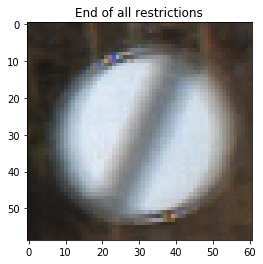

SHAPE:  (59, 61, 3)


In [ ]:
index = 2345
PlotPicture(x_test, y_test_names, index)
print('SHAPE: ', x_test[index].shape)

In [ ]:
# Normalize:

x_test = x_test/255

# Round up to two decimal places:

for i in range(len(x_test)):
    x_test[i] = np.around(x_test[i], decimals = 2)

In [ ]:
if "x_test_resized.npy" in os.listdir(numpy_dir):
    X_test = np.load(numpy_dir + "x_test_resized.npy", allow_pickle = True)

else:

    # Resize images:
    X_test = np.array([resize(image, (img_width, img_height)) for image in x_test])

    # Round values up to two decimal places before saving:
    for i in range(len(X_test)):
        X_test[i] = np.around(X_test[i], decimals = 2)

    # Save to checkpoint file:
    np.save(numpy_dir + "x_test_resized.npy" , X_test)

In [ ]:
# For naming-convention consistency:
Y_test = y_test
Y_test_names = y_test_names

Check **test** pictures after resizing:

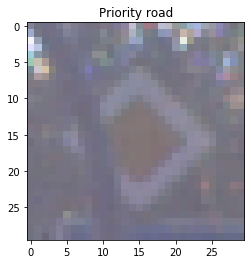

SHAPE:  (30, 30, 3) LABEL:  Priority road


array([[[0.51, 0.51, 0.6 ],
        [0.45, 0.45, 0.51],
        [0.45, 0.44, 0.53],
        ...,
        [0.51, 0.49, 0.59],
        [0.46, 0.46, 0.5 ],
        [0.5 , 0.52, 0.53]],

       [[0.63, 0.67, 0.8 ],
        [0.46, 0.47, 0.53],
        [0.44, 0.43, 0.52],
        ...,
        [0.48, 0.49, 0.58],
        [0.46, 0.5 , 0.52],
        [0.5 , 0.54, 0.53]],

       [[0.96, 0.96, 0.97],
        [0.59, 0.63, 0.7 ],
        [0.41, 0.44, 0.52],
        ...,
        [0.48, 0.49, 0.51],
        [0.52, 0.52, 0.52],
        [0.58, 0.58, 0.56]],

       ...,

       [[0.47, 0.45, 0.5 ],
        [0.46, 0.45, 0.51],
        [0.47, 0.46, 0.51],
        ...,
        [0.47, 0.48, 0.54],
        [0.48, 0.48, 0.54],
        [0.48, 0.48, 0.54]],

       [[0.45, 0.45, 0.5 ],
        [0.47, 0.47, 0.53],
        [0.45, 0.45, 0.52],
        ...,
        [0.45, 0.47, 0.56],
        [0.45, 0.47, 0.57],
        [0.46, 0.48, 0.57]],

       [[0.44, 0.45, 0.51],
        [0.46, 0.46, 0.52],
        [0.42, 0

In [ ]:
# Check x_test
index = 1485

PlotPicture(X_test, y_test_names, index)
print('SHAPE: ', X_test[index].shape, 'LABEL: ', class_names[y_test[index]])
X_test[index]

### 2.2.2 Split training set into train and validation set
<a class="anchor" id="2_2_2" name="2_2_2"></a>
#### [Return to index](#main_title)

In [ ]:
validation_split_files = ["x_train_split.npy", "y_train_split.npy", "x_val_split.npy", "y_val_split.npy"]

# Will only attempt to load the checkpoint files for the train and validation split if the four legs of the split are present:

if all([file in os.listdir(numpy_dir) for file in validation_split_files]):
    X_train = Recover_X_train()
    X_val = Recover_X_val()
    Y_train = Recover_Y_train()
    Y_val = Recover_Y_val()

else:
    
    # Shuffle train pictures:
    shuffle_indexes = np.arange(x_train.shape[0])
    np.random.shuffle(shuffle_indexes)

    x_train = x_train[shuffle_indexes]
    y_train = y_train[shuffle_indexes]


    # Split the train data into train and validation set:
    X_train, X_val, Y_train, Y_val = train_test_split(x_train, y_train, test_size=0.3, random_state=42, shuffle=True)

    np.save(numpy_dir + "x_train_split.npy" , X_train)
    np.save(numpy_dir + "y_train_split.npy" , Y_train)
    np.save(numpy_dir + "x_val_split.npy" , X_val)
    np.save(numpy_dir + "y_val_split.npy" , Y_val)

    print("X_train.shape", X_train.shape)
    print("X_valid.shape", X_val.shape)
    print("y_train.shape", Y_train.shape)
    print("y_valid.shape", Y_val.shape)


# names array needs rebuilding from the category-codes array Y_val
Y_train_names = [class_names[label] for label in Y_train] 
Y_val_names = [class_names[label] for label in Y_val]

X_train.shape (67725, 30, 30, 3)
X_valid.shape (29025, 30, 30, 3)
y_train.shape (67725,)
y_valid.shape (29025,)


Trial cell to check picture loading:

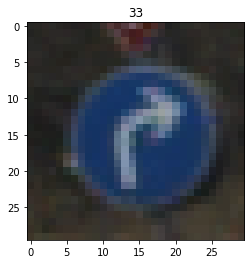

SHAPE:  (30, 30, 3) LABEL:  Turn right ahead


array([[[0.15, 0.15, 0.14],
        [0.16, 0.15, 0.14],
        [0.18, 0.16, 0.15],
        ...,
        [0.18, 0.16, 0.15],
        [0.17, 0.16, 0.14],
        [0.18, 0.16, 0.15]],

       [[0.14, 0.14, 0.13],
        [0.15, 0.15, 0.13],
        [0.17, 0.16, 0.14],
        ...,
        [0.18, 0.18, 0.16],
        [0.16, 0.17, 0.14],
        [0.16, 0.16, 0.13]],

       [[0.16, 0.16, 0.15],
        [0.15, 0.15, 0.14],
        [0.16, 0.14, 0.14],
        ...,
        [0.17, 0.17, 0.16],
        [0.18, 0.18, 0.16],
        [0.18, 0.17, 0.15]],

       ...,

       [[0.23, 0.21, 0.16],
        [0.2 , 0.19, 0.15],
        [0.17, 0.17, 0.14],
        ...,
        [0.24, 0.22, 0.18],
        [0.26, 0.22, 0.18],
        [0.25, 0.22, 0.17]],

       [[0.22, 0.19, 0.15],
        [0.21, 0.2 , 0.15],
        [0.16, 0.16, 0.12],
        ...,
        [0.26, 0.24, 0.18],
        [0.28, 0.22, 0.17],
        [0.26, 0.21, 0.17]],

       [[0.24, 0.21, 0.16],
        [0.26, 0.25, 0.19],
        [0.24, 0

In [ ]:
index = 12777

PlotPicture(X_train, Y_train, index)
print('SHAPE: ', X_train[index].shape, 'LABEL: ', class_names[Y_train[index]])
X_train[index]

### 2.2.3 Dimensionality reduction
<a class="anchor" id="2_2_3" name="2_2_3"></a>
#### [Return to index](#main_title)

Create a **black and white** dataset from the augmented sets processed above:

In [ ]:
def ConvertGray(img):
    '''
    Takes an image array from picture data and returns the same picture in gray scale, keeping all dimensions.
    '''
    #new_image = img[:, :, 0]*0.299 + img[:, :, 1]*0.587 + img[:, :, 2]*0.114
    
    R, G, B = img[:, :, 0], img[:, :, 1], img[:, :, 2]
    gray_img = 0.2989 * R + 0.587 * G + 0.114 * B
    
    return gray_img


In [ ]:
# Look for checkpoints before attempting to convert pictures to black and white by numpy slicing:

bw_checkpoints = ["x_train_split_bw.npy", "x_val_split_bw.npy", "x_test_resized_bw.npy"]

# Will only attempt to load the checkfiles if all the three legs are present in the checkpoint directory:
if all([file in os.listdir(numpy_dir) for file in bw_checkpoints]):
    
    X_train_bw = np.load(numpy_dir + "x_train_split_bw.npy", allow_pickle = True)
    X_val_bw = np.load(numpy_dir + "x_val_split_bw.npy", allow_pickle = True)
    X_test_bw = np.load(numpy_dir + "x_test_resized_bw.npy", allow_pickle = True)

else:

    X_train_bw = np.array( [ ConvertGray(picture) for picture in X_train ] )
    X_val_bw = np.array( [ ConvertGray(picture) for picture in X_val ] )
    X_test_bw = np.array( [ ConvertGray(picture) for picture in X_test ] )

    np.save(numpy_dir + "x_train_split_bw.npy", X_train_bw)
    np.save(numpy_dir + "x_val_split_bw.npy", X_val_bw)
    np.save(numpy_dir + "x_test_resized_bw.npy", X_test_bw)

Check a random picture and its new shape from the new black and white dataset:

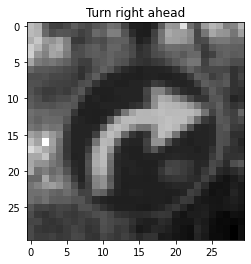

Shape:  (30, 30)


In [ ]:
#plt.imshow(gray, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)

index = 50217
PlotPicture(X_train_bw, Y_train_names, index)
print('Shape: ', X_train_bw[index].shape)

### 2.2.4 Black and white conversion without dimensionality reduction
<a class="anchor" id="2_2_4" name="2_2_4"></a>
#### [Return to index](#main_title)

In order to create black and white pictures without reducing one dimension, we use the formula **_0.2989 * R + 0.587 * G + 0.114 * B_** , so we can mix color and black and white pictures in the same dataset:

Original picture shape: (30, 30, 3)
Grayscale-converted picture shape: (30, 30)


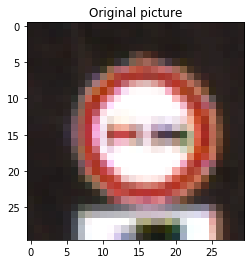

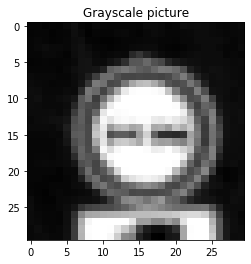

In [ ]:
def ConvertGray(img):

    R, G, B = img[:, :, 0], img[:, :, 1], img[:, :, 2]
    gray_img = 0.2989 * R + 0.587 * G + 0.114 * B
    
    return gray_img


colour_picture = X_train[0]

print("Original picture shape:", colour_picture.shape)
plt.figure()
plt.title('Original picture')
plt.imshow(colour_picture, cmap = 'gray')

gray_picture = ConvertGray(colour_picture)

print("Grayscale-converted picture shape:", gray_picture.shape)
plt.figure()
plt.title('Grayscale picture')
plt.imshow(gray_picture, cmap = 'gray')

In [ ]:
np.array([colour_picture, gray_picture])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


ValueError: could not broadcast input array from shape (30,30,3) into shape (30,30)

Check a random picture and its new shape from the new black and white dataset:

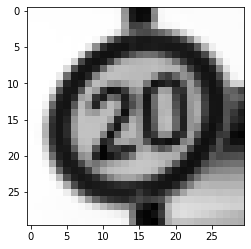

shape:  (30, 30)


In [ ]:
test_pic = X_train[25]
test_pic_bw = ConvertGray(test_pic)

plt.imshow(test_pic_bw, cmap='gray')
plt.show()
print('shape: ', test_pic_bw.shape)

plt.imshow(test_pic_bw, cmap='gray')
plt.show()
print('shape: ', test_pic_bw.shape)

In [ ]:
shuffle_indexes_train = random.sample( range(X_train.shape[0]), int(X_train.shape[0]/2) )

type(shuffle_indexes_train)

range(len(X_train))

range(0, 67725)

In [ ]:
# Look for checkpoints before attempting to create a mixed dataset of color & black and white pictures:

mix_checkpoints = ["x_train_split_mix.npy", "x_val_split_mix.npy", "x_test_resized_mix.npy"]

# Will only attempt to load the checkfiles if all three legs are present in the checkpoint directory:
if all([file in os.listdir(numpy_dir) for file in mix_checkpoints]):
    
    X_train_mix = np.load(numpy_dir + "x_train_split_mix.npy", allow_pickle = True)
    X_val_mix = np.load(numpy_dir + "x_val_split_mix.npy", allow_pickle = True)
    X_test_mix = np.load(numpy_dir + "x_test_resized_mix.npy", allow_pickle = True)

else:


    X_train_mix = []
    X_val_mix = []
    X_test_mix = []


    # Train dataset
    shuffle_indexes_train = random.sample( range(X_train.shape[0]), int(X_train.shape[0]/2) )

    for index in range(len(X_train)):
        if index in shuffle_indexes_train:
            X_train_mix.append(ConvertGray(X_train[index]))
        else:
            X_train_mix.append(X_train[index])
            
            
    # Val dataset
    shuffle_indexes_val = random.sample( range(X_val.shape[0]), int(X_val.shape[0]/2) )

    for index in range(len(X_val)):
        if index in shuffle_indexes_val:
            X_val_mix.append(ConvertGray(X_val[index]))
        else:
            X_val_mix.append(X_val[index])


    # Test dataset
    shuffle_indexes_test = random.sample( range(X_test.shape[0]), int(X_test.shape[0]/2) )

    for index in range(len(X_test)):
        if index in shuffle_indexes_test:
            X_test_mix.append(ConvertGray(X_test[index]))
        else:
            X_test_mix.append(X_test[index])
    
    
    X_train_mix = np.array(X_train_mix)
    X_val_mix = np.array(X_val_mix)
    X_test_mix = np.array(X_test_mix)
    
    # Generate checkpoint files
    np.save(numpy_dir + "x_train_split_mix.npy", X_train_mix)
    np.save(numpy_dir + "x_val_split_mix.npy", X_val_mix)
    np.save(numpy_dir + "x_test_split_mix.npy", X_test_mix)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


ValueError: could not broadcast input array from shape (30,30,3) into shape (30,30)

## 2.3 Literature Review 
<a class="anchor" id="2_3" name="2_3"></a>
#### [Return to index](#main_title)

<br/>
<br/>
Data review and justification for choosing the model below will be detailed in the Markdown report.
<br/>
<br/>

***
# 3 Implementation + results 
<a class="anchor" id="3" name="3"></a>
#### [Return to index](#main_title)

## 3.0 Define model functions
<a class="anchor" id="3_1" name="3_1"></a>
#### [Return to index](#main_title)

Define functions to handle the models implemented during this section.

<br/>


|     **Object name**     | **Type** |                                                **Description**                                                |
|:-----------------------:|:--------:|:-------------------------------------------------------------------------------------------------------------:|
|     GetNowString        | Function |         Creates a string timestamp used to name saved models, history objects and csv callbacks               |
|     ModelReport         | Function |         Trains a model given a train and validation set, returning model summary, history and evaluation      |
|     PlotHistory         | Function |   Plots the contents of a history object following a model training. Handles both object and dict versions.   |
|     PlotPrediction      | Function |         Creates a prediction object given a test set, plotting results actual vs prediction                   |
|     RecoverModelHistory | Function |         Restores a saved model and optionally a history object                                                |


<br/>
<br/>

***

In [ ]:
# Run if neccesary, when in a new notebook session:

#RecoverEverything()

class_names  recovered 
x_train  recovered , augmented stage
y_train  recovered 
y_train_names  recovered 
x_test  recovered , resized stage
y_test  recovered 
y_test_names  recovered 
Y_train  recovered 
Y_train_names  recovered 
Y_val  recovered 
X_train  recovered 
X_val  recovered 
X_test  recovered 
X_train_bw  recovered 
X_val_bw  recovered 
X_test_bw  recovered 
img_height  recovered 
img_width  recovered 
channels  recovered 


In [ ]:
# Generate a timestamp string that will be used as model name when saving to file:

def GetNowString():
    '''
    Uses datetime to return a timestamp string in the format DDMMYYYY_HHMMSS
    '''
    return datetime.now().strftime("%d/%m/%Y").replace("/","") + "_" + datetime.now().strftime("%X").replace(":","")


# Generate a model report:

def ModelReport(model, 
                X_train, Y_train, X_val, Y_val, X_test, Y_test, 
                epochs = 30, 
                optimizer = "sgd", 
                callbacks=True,
                save_name = "",
                save_model = True, 
                save_history = True, 
                history_dict = False):
  
    '''
    Given a Keras model, a train, validation and test set, returns a model summary, history object and evaluation results.

    Params:
    model, X_train, Y_train, X_val, Y_val, X_test, Y_test: train, validation and test set, and Kera's model
    epochs = 30, optimizer = "sgd": Train and compile parameters fed into the model. 
    callbacks=True, save_model = True, save_history = True: Save model using a timestamp name.
    history_dict = False

    Returns:
    summary, history, evaluation: Kera's model summary, history object and evaluation results
    '''

    # If a save_name parameter is provided, this will be used to save the files. Otherwise a timestamp will be used:
    if save_name == "" or save_name == None:
        run_name = GetNowString()
    else:
        run_name = save_name

    # Saving model & history:
    if save_model or save_history:
        model_name = saved_models_dir + run_name
        history_name = saved_history_dir + run_name
    
    if callbacks:
        history_logger_name = saved_csv_logger_dir + run_name + ".csv"
        history_logger=tf.keras.callbacks.CSVLogger(history_logger_name, separator=",", append=True)
        callbacks = [history_logger]
        print("\nCallbacks csv file started: ", history_logger_name, "\n")
  
    else:
        callbacks = None

    # Print summary:
    summary = model.summary()

    # Compile using input optimizer. Default is "sgd":
    model.compile(loss = "sparse_categorical_crossentropy", optimizer = optimizer, metrics = ["accuracy"])

    # Starts training creating a history object:
    history = model.fit(X_train, Y_train, epochs = epochs, callbacks = callbacks, validation_data=(X_val, Y_val))

    # Performs evaluation against Test set (X_test, Y_test):
    evaluation = model.evaluate(X_test, Y_test)

    # Perform saving operations:
    if save_model:
        model.save(model_name)
        print('\nModel saved to: ', model_name)

    if save_history:
    
        if history_dict: # Saving history dict only (history_dict = True)
            np.save(history_name + ".npy" , history.history)
            print('\nHistory dict saved to: ', history_name + ".npy")
        
        else:
            with open(history_name + ".obj", "wb+") as file:
                pickle.dump(history, file) # Dumping whole history object

        print('\nHistory object saved to: ', history_name + ".obj")
    
    return summary, history, evaluation



def PlotHistory(history, history_dict = False):

    '''
    Shows training history from a model fitting, using a history object.
    Plots accuracy and loss from training and validation sets, per epoch.

    Params:
    history: History object or History dict (history.history), depending on second parameter history_dict boolean value.

    '''

    if history_dict:
        pd.DataFrame(history).plot(figsize=(8, 5))   # history dict (np.save + np.load with .item()):

    else:
        pd.DataFrame(history.history).plot(figsize=(8, 5))   # history object (pickle):

    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

    return None



def PlotPrediction(model, X_test, Y_test_names):

    '''
    Uses Kera's model.predict() to create predictions from a given model, using 25 pictures from a test set.

    Params:
    model, X_test, Y_test_names: Kera's model and a test set with its corresponding labels.

    '''

    pred = model.predict(X_test) 
    classes_x = np.argmax(pred,axis=1)

    plt.figure(figsize = (25, 25))

    start_index = 0

    for i in range(25):

        plt.subplot(5, 5, i + 1)
        plt.grid(False)
        plt.xticks([])
        plt.yticks([])

        prediction = class_names[classes_x[start_index + i]]
        actual = Y_test_names[start_index + i]

        col = 'g'

        if prediction != actual:
            col = 'r'

        # Single line label:    
        #plt.xlabel('Actual={} || Pred={}'.format(actual, prediction), color = col)
        # Multi line label:
        plt.xlabel('Actual={} \n Pred={}'.format(actual, prediction), color = col)


        plt.imshow(X_test[start_index + i], cmap='gray')

    plt.show()

    return None



def RecoverModelHistory(model_name, history_name = None, history_dict = False):

    '''
    Recover a Kera's model and a history dict previously saved with Kera's model.save()

    '''

    model = tf.keras.models.load_model( saved_models_dir + model_name)

    try:

        if history_dict:
            history = np.load(saved_history_dir + history_name, allow_pickle=True).item() # history.history (dict) saved with np.save
    
        else:
            history = LoadPickleObject(saved_history_dir + history_name)
        
        print('Model and history objects recovered')
        return model, history
  
    except:
        print('Only model object was recovered. Model object returned')
        return model, None
  

In [ ]:
#model.save(folderpath)
#model_recovered = tf.keras.models.load_model(folderpath)

## 3.1 Model implementation 
<a class="anchor" id="3_1" name="3_1"></a>
#### [Return to index](#main_title)

### 3.1.1 CNN Architecture  
<a class="anchor" id="3_1_1" name="3_1_1"></a>
#### [Return to index](#main_title)

In our first model ( _**model**_ ), we will run a classic CNN architecture made by 2 steps of convolutional layers, followed by a flatten layer. The activation functions on the first attempt will be ReLU to reduce computation times, as this is our first attempt.


In [ ]:
input_shape = (img_height, img_width, channels)
input_shape_bw = (img_height, img_width, 1)

In [ ]:
cnn1 = keras.models.Sequential([

keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(img_height, img_width, channels)),
keras.layers.MaxPooling2D(pool_size=(2, 2)),
keras.layers.Dropout(0.2),

keras.layers.Flatten(),

keras.layers.Dense(128, activation='relu'),
keras.layers.Dense(10, activation='softmax')
])

In [ ]:
cnn3 = keras.models.Sequential([
                                
keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
keras.layers.MaxPooling2D((2, 2)),
keras.layers.Dropout(0.25),

keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
keras.layers.MaxPooling2D(pool_size=(2, 2)),
keras.layers.Dropout(0.25),

keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
keras.layers.Dropout(0.4),

keras.layers.Flatten(),

keras.layers.Dense(128, activation='relu'),
keras.layers.Dropout(0.3),
keras.layers.Dense(10, activation='softmax')
])

In [ ]:
cnn4 = keras.models.Sequential([

keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
keras.layers.BatchNormalization(),

keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
keras.layers.BatchNormalization(),
keras.layers.MaxPooling2D(pool_size=(2, 2)),
keras.layers.Dropout(0.25),

keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
keras.layers.BatchNormalization(),
keras.layers.Dropout(0.25),

keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
keras.layers.BatchNormalization(),
keras.layers.MaxPooling2D(pool_size=(2, 2)),
keras.layers.Dropout(0.25),

keras.layers.Flatten(),

keras.layers.Dense(512, activation='relu'),
keras.layers.BatchNormalization(),
keras.layers.Dropout(0.5),

keras.layers.Dense(128, activation='relu'),
keras.layers.BatchNormalization(),
keras.layers.Dropout(0.5),

keras.layers.Dense(10, activation='softmax')
])

In [ ]:
# Create a CNN model:

model = keras.models.Sequential([    
    keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=input_shape), # img parameters and channels were defined in section 2
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate=0.5),
    
    keras.layers.Dense(43, activation='softmax')
])


In [ ]:
# Create a CNN model:

model_bw = keras.models.Sequential([    
    keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(img_height, img_width, 1)),
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate=0.5),
    
    keras.layers.Dense(43, activation='softmax')
])


In [ ]:
model_lenet5 = keras.models.Sequential([
                                         
    keras.layers.Conv2D(6, kernel_size=5, strides=1,  activation='tanh', input_shape=(30, 30, 3), padding='same'), #C1
    keras.layers.AveragePooling2D(), #S2

    keras.layers.Conv2D(16, kernel_size=5, strides=1, activation='tanh', padding='valid'), #C3
    keras.layers.AveragePooling2D(), #S4

    keras.layers.Conv2D(120, kernel_size=5, strides=1, activation='tanh', padding='valid'), #C5

    keras.layers.Flatten(), #Flatten    
    keras.layers.Dense(84, activation='tanh'), #F6
    keras.layers.Dense(10, activation='softmax') #Output layer
])

In [ ]:
model_alexnet_original = keras.models.Sequential([                                 
    keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(227,227,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])

## 3.2 Model training and parameter tuning
<a class="anchor" id="3_2" name="3_2"></a>
#### [Return to index](#main_title)

## 3.3 Performance review
<a class="anchor" id="3_3" name="3_3"></a>
#### [Return to index](#main_title)

## Color set

In [ ]:
summary, history, evaluation = ModelReport(model, 
                                           X_train, Y_train, X_val, Y_val, X_test, Y_test, 
                                           epochs=15, 
                                           optimizer="sgd", 
                                           callbacks=True,
                                           save_name = "color_set", 
                                           save_model=True, 
                                           save_history=True, 
                                           history_dict=False)


Callbacks csv file started:  /content/gdrive/My Drive/cmt307-g12/data/saved_csv_logger/color_set.csv 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        4640      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 13, 13, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 64)        18496     
                  

In [ ]:
# Run this cell to recover the above model in later sessions:

model, history = RecoverModelHistory(model_name = "color_set", history_name = "color_set.obj", history_dict = False)

model.compile(loss = "sparse_categorical_crossentropy", optimizer = "sgd", metrics = ["accuracy"])
evaluation = model.evaluate(X_test, Y_test)

evaluation

Model and history objects recovered
395/395 [==============================] - 2s 3ms/step - loss: 0.0858 - accuracy: 0.9743


[0.08576886355876923, 0.9742676019668579]

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

<Figure size 720x720 with 0 Axes>

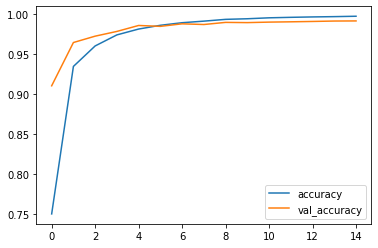

In [ ]:
plt.figure(figsize=(10,10))

pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()

plt.show()

## Black and White set

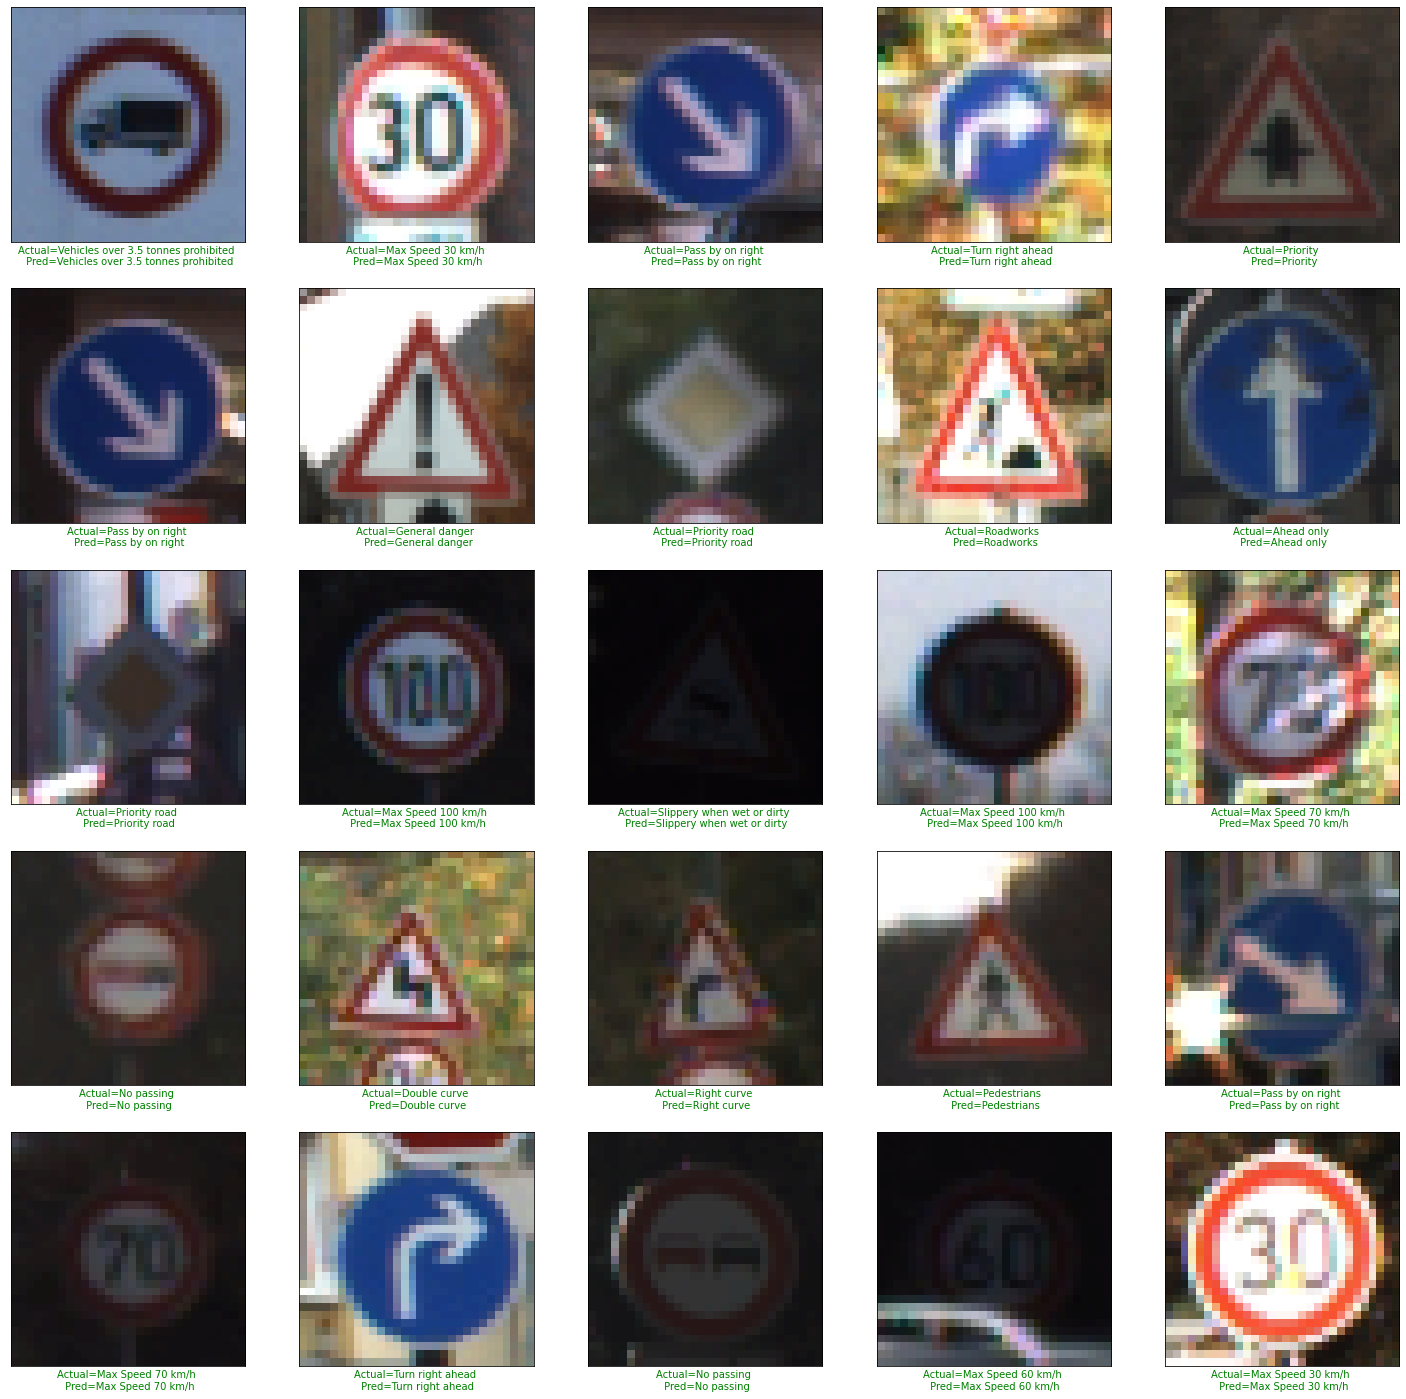

In [ ]:
PlotPrediction(model, X_test, Y_test_names)

In [ ]:
summary_bw, history_bw, evaluation_bw = ModelReport(model_bw, 
                                           X_train_bw, Y_train, X_val_bw, Y_val, X_test_bw, Y_test, 
                                           epochs=15, 
                                           optimizer="sgd", 
                                           callbacks=True,
                                           save_name = "bw_set", 
                                           save_model=True, 
                                           save_history=True, 
                                           history_dict=False)


Callbacks csv file started:  /content/gdrive/My Drive/cmt307-g12/data/saved_csv_logger/bw_set.csv 

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 28, 28, 16)        160       
                                                                 
 conv2d_11 (Conv2D)          (None, 26, 26, 32)        4640      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization_3 (Batc  (None, 13, 13, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_12 (Conv2D)          (None, 11, 11, 64)        18496     
                   

In [ ]:
# Run this cell to recover the above model in future sessions:

model_bw, history_bw = RecoverModelHistory(model_name = "bw_set", history_name = "bw_set.obj", history_dict = False)

model_bw.compile(loss = "sparse_categorical_crossentropy", optimizer = "sgd", metrics = ["accuracy"])
evaluation_bw = model_bw.evaluate(X_test_bw, Y_test)

Model and history objects recovered
395/395 [==============================] - 3s 5ms/step - loss: 0.0682 - accuracy: 0.9800


In [ ]:
evaluation

[0.08576887100934982, 0.9742676019668579]

In [ ]:
evaluation_bw

[0.06824600696563721, 0.9799683094024658]

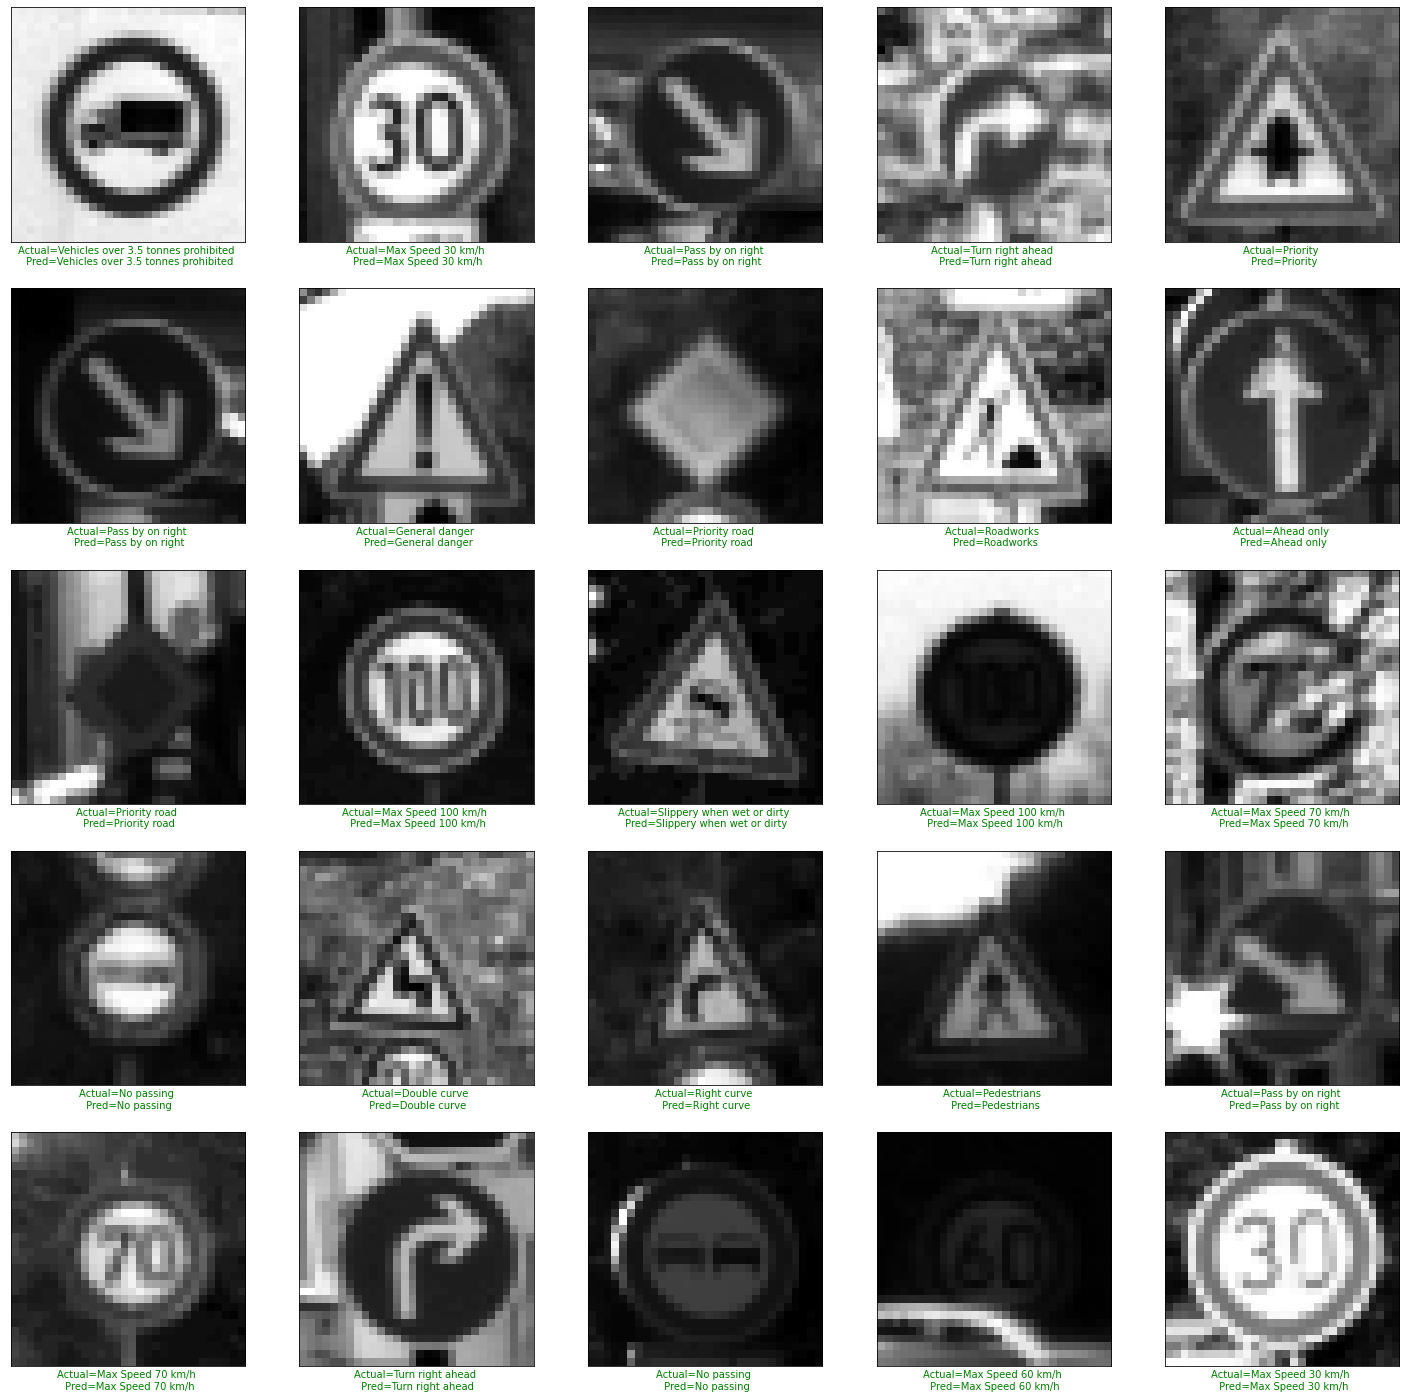

In [ ]:
PlotPrediction(model_bw, X_test_bw, Y_test_names)

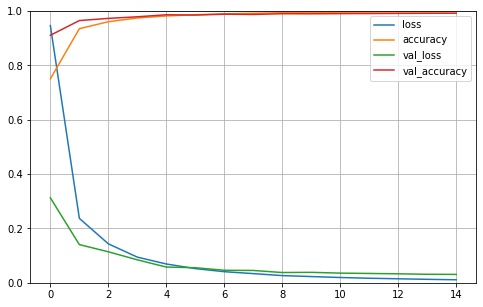

In [ ]:
PlotHistory(history)

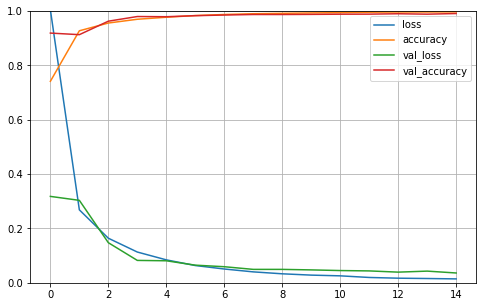

In [ ]:
PlotHistory(history_bw)

## Optimizers loop:

Define a function to repeat the model training but using different optimizers, to compare stochastic gradient descent against other methods:

In [ ]:
from keras import optimizers as opt
from collections import defaultdict

optimizers = {"RMSprop": {"optimizer": tf.keras.optimizers.RMSprop(), "color":"blue"},
                "adam_01": {"optimizer": tf.keras.optimizers.Adam(learning_rate=0.01),"color":"red"},
                "sgd": {"optimizer": tf.keras.optimizers.SGD(), "color":"purple"},
                "adadelta": {"optimizer": tf.keras.optimizers.Adadelta(), "color":"pink"},
                "adagrad": {"optimizer": tf.keras.optimizers.Adagrad(), "color":"yellow"}}

def OptimizerAnalysis(model, optimizers, X_train, Y_train, X_val, Y_val, X_test, Y_test, epochs=5, ):

    results = dict.fromkeys(optimizers.keys())

    for optimizer, d in optimizers.items():
        print("\n\n", f'Testing {optimizer}')

        summary, history, evaluation = ModelReport(model, 
                                                   X_train, Y_train, X_val, Y_val, X_test, Y_test, 
                                                   epochs=epochs, 
                                                   optimizer=d['optimizer'], 
                                                   callbacks=False, 
                                                   save_model=False, 
                                                   save_history=False, 
                                                   history_dict=False)

        results[str(optimizer)] = {'history': history, 'evaluation' : evaluation}

        return results


In [ ]:
# Delete this cell once the above function is tested to work ok

from keras import optimizers as opt
from collections import defaultdict


optimizers = {"RMSprop": {"optimizer": tf.keras.optimizers.RMSprop(), "color":"blue"},
              "adam_01": {"optimizer": tf.keras.optimizers.Adam(learning_rate=0.01),"color":"red"},
              "sgd": {"optimizer": tf.keras.optimizers.SGD(), "color":"purple"},
              "adadelta": {"optimizer": tf.keras.optimizers.Adadelta(), "color":"pink"},
              "adagrad": {"optimizer": tf.keras.optimizers.Adagrad(), "color":"yellow"}}


results = dict.fromkeys(optimizers.keys())

for optimizer, d in optimizers.items():
    print("\n\n", f'Testing {optimizer}')

    summary, history, evaluation = ModelReport(model, X_train, Y_train, X_val, Y_val, X_test, Y_test, epochs=5, optimizer=d['optimizer'], callbacks=False, save_model=False, save_history=False, history_dict=False)

    results[str(optimizer)] = {'history': history, 'evaluation' : evaluation}




 Testing RMSprop
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        4640      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 13, 13, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 9

In [ ]:
results

{'RMSprop': {'evaluation': [0.16675709187984467, 0.961361825466156],
  'history': <keras.callbacks.History at 0x7f381c23e490>},
 'adadelta': {'evaluation': [0.1082409992814064, 0.9825019836425781],
  'history': <keras.callbacks.History at 0x7f38b1c0ec10>},
 'adagrad': {'evaluation': [0.10707578808069229, 0.9830561876296997],
  'history': <keras.callbacks.History at 0x7f38b25c0750>},
 'adam_01': {'evaluation': [0.2636033594608307, 0.9645289182662964],
  'history': <keras.callbacks.History at 0x7f3764224f90>},
 'sgd': {'evaluation': [0.1104220375418663, 0.9821852445602417],
  'history': <keras.callbacks.History at 0x7f38b2a84f10>}}

In [ ]:
# Save optimizer analysis
SavePickleObject(data_dir + "objects/color_set_optimizers", results)

INFO:tensorflow:Assets written to: ram://dbbe2d1c-ccd4-4016-b9f7-269b0d6a7e78/assets


In [ ]:
# Load optimizer analysis
results = LoadPickleObject(data_dir + "objects/color_set_optimizers")

In [ ]:
def PlotOptimizerEvaluation(results, title):

    loss = [ round(results[key]['evaluation'][0]*100 , 2) for key in results ]
    accuracy = [ round(results[key]['evaluation'][1]*100 , 2) for key in results ]

    def create_x(t, w, n, d):
        return [t*x + w*n for x in range(d)]

    '''
    t = 2 # There are two sets of data: A and B
    w = 0.8 # We generally want bars to be 0.8
    n = 1 # A is first set of data
    d = 5 # There are 5 topics we're plotting
    '''

    accuracy_x = create_x(2, 0.8, 1, 5)
    loss_x = create_x(2, 0.8, 2, 5)

    #middle_x = [x-1 for x in accuracy]
    middle_x = [ (a + b) / 2.0 for a, b in zip(accuracy_x, loss_x)]


    fig = plt.figure(figsize=(10,8))
    ax=plt.subplot()

    plt.bar(accuracy_x, accuracy, color = "lightblue")
    #ax = sns.barplot(accuracy_x, accuracy, palette="Blues_d")

    plt.bar(loss_x, loss, color = "navy")
    #ax = sns.barplot(loss_x, loss, palette="Blues_d")

    ax.set_xticks(middle_x) # using MIDDLE_X calculated above to locate xtick LABELS
    ax.set_xticklabels(results.keys()) # labels we want to put on the x ticks

    plt.legend(["Accuracy", "Loss"])

    plt.title(title)
    plt.xlabel('Optimizer')
    plt.ylabel('Percentage (%)')

    plt.show()


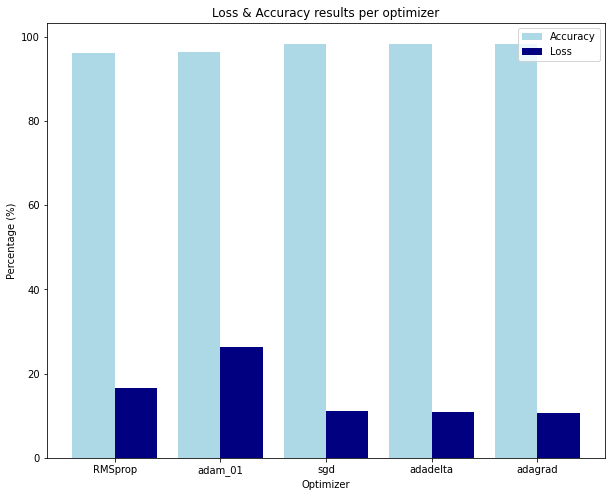

In [ ]:
PlotOptimizerEvaluation(results, 
                        title = 'Loss & Accuracy results per optimizer' )

## Impact of number of convolutional layers

In [ ]:
results = []
models_cnn = [cnn1, cnn3, cnn4]

for cnn in models_cnn:

    summary, history, evaluation = ModelReport(cnn, 
                                        X_train, Y_train, X_val, Y_val, X_test, Y_test, 
                                        epochs=30, 
                                        optimizer="sgd", 
                                        callbacks=False, 
                                        save_name="", 
                                        save_model=False, 
                                        save_history=False, 
                                        history_dict=False)
    
    results.append((summary, history, evaluation))

results_dict = dict(zip(['cnn1', 'cnn3', 'cnn4'], results))

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 flatten_1 (Flatten)         (None, 6272)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               802944    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                      

AttributeError: ignored

In [ ]:
cnn4_bw = keras.models.Sequential([

keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape_bw),
keras.layers.BatchNormalization(),

keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
keras.layers.BatchNormalization(),
keras.layers.MaxPooling2D(pool_size=(2, 2)),
keras.layers.Dropout(0.25),

keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
keras.layers.BatchNormalization(),
keras.layers.Dropout(0.25),

keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
keras.layers.BatchNormalization(),
keras.layers.MaxPooling2D(pool_size=(2, 2)),
keras.layers.Dropout(0.25),

keras.layers.Flatten(),

keras.layers.Dense(512, activation='relu'),
keras.layers.BatchNormalization(),
keras.layers.Dropout(0.5),

keras.layers.Dense(128, activation='relu'),
keras.layers.BatchNormalization(),
keras.layers.Dropout(0.5),

keras.layers.Dense(10, activation='softmax')
])

In [ ]:
summary_cnn4, history_cnn4, evaluation_cnn4 = ModelReport(model_bw, 
                                        X_train_bw, Y_train, X_val_bw, Y_val, X_test_bw, Y_test, 
                                        epochs=30, 
                                        optimizer="sgd", 
                                        callbacks=False, 
                                        save_name="", 
                                        save_model=False, 
                                        save_history=False, 
                                        history_dict=False)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 28, 28, 16)        160       
                                                                 
 conv2d_11 (Conv2D)          (None, 26, 26, 32)        4640      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization_3 (Batc  (None, 13, 13, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_12 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 conv2d_13 (Conv2D)          (None, 9, 9, 128)        

KeyboardInterrupt: ignored

In [ ]:
loss = [ round(results[key]['evaluation'][0]*100 , 2) for key in results ]
    accuracy = [ round(results[key]['evaluation'][1]*100 , 2) for key in results ]

    def create_x(t, w, n, d):
        return [t*x + w*n for x in range(d)]

    '''
    t = 2 # There are two sets of data: A and B
    w = 0.8 # We generally want bars to be 0.8
    n = 1 # A is first set of data
    d = 5 # There are 5 topics we're plotting
    '''

    accuracy_x = create_x(2, 0.8, 1, 5)
    loss_x = create_x(2, 0.8, 2, 5)

    #middle_x = [x-1 for x in accuracy]
    middle_x = [ (a + b) / 2.0 for a, b in zip(accuracy_x, loss_x)]


    fig = plt.figure(figsize=(10,8))
    ax=plt.subplot()

    plt.bar(accuracy_x, accuracy, color = "lightblue")
    #ax = sns.barplot(accuracy_x, accuracy, palette="Blues_d")

    plt.bar(loss_x, loss, color = "navy")
    #ax = sns.barplot(loss_x, loss, palette="Blues_d")

    ax.set_xticks(middle_x) # using MIDDLE_X calculated above to locate xtick LABELS
    ax.set_xticklabels(results.keys()) # labels we want to put on the x ticks

    plt.legend(["Accuracy", "Loss"])

    plt.title(title)
    plt.xlabel('Optimizer')
    plt.ylabel('Percentage (%)')

    plt.show()